## Task 2.4

In [62]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use("classic")


df1=pd.read_csv('Customer_and_bank details_p1.csv')
df2=pd.read_csv('Customer_campaign_details_p1.csv')
df3=pd.read_csv('Customer_Postal_Code_details.csv')
df4=pd.read_csv('Customer_Response_data_p1.csv')
df5=pd.read_csv('Customer_social_economic_data_p1.csv')
region=pd.read_csv("Region_code_master.csv")
city=pd.read_csv("City_Master.csv")
state=pd.read_csv("State_Master.csv")
df3=df3.rename({'customer_id':'Customer_id'},axis='columns')
df6=pd.merge(df1,df2, on='Customer_id', how='inner')
df7=pd.merge(df4,df5, on='Customer_id', how='inner')
df8=pd.merge(df6,df7, on='Customer_id', how='inner')
df=pd.merge(df8,df3,on='Customer_id' ,how='inner')
df=pd.merge(df,state,on='State_Code')
df=pd.merge(df,city,on='City_Code')
df=df.drop(['State_Code_y','Region_Code_y'],axis=1)
df=df.rename({'Region_Code_x':'Region_Code','State_Code_x':'State_Code','y':'Response_Target'},axis=1)
df1=pd.merge(state,region,on="Region_Code")
df=pd.merge(df,df1,on='State_Code')
df=df.drop(['State_Name_y','Region_Code_y'],axis=1)
df_data=df.drop(['Customer_id','Region_Code_x','State_Code','City_Code','Postal Code'],axis=1)
df_data['Response_Target']=df_data['Response_Target'].map(lambda x:1 if x=='yes' else 0)



In [63]:
def con(x):
    if x==999:
        return 'no'
    else:
        return 'yes'

df_data['pdays']=df_data['pdays'].map(con)

In [64]:
def get_duration(x):
    if 0<x<200:
        return 'LOW'
    elif 200<=x<700:
        return 'MEDIUM'
    else:
        return 'HIGH'
df_data['duration']=df_data.duration.map(get_duration)

In [65]:
age_median=df_data.age.median()
campaign_median=df_data.campaign.median()

df_data['age'].loc[(df_data['age']>df_data.age.quantile(0.99))]=age_median
df_data['campaign'].loc[(df_data['campaign']>df_data.campaign.quantile(0.99))]=campaign_median

In [66]:
df_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,Response_Target,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
2,32,admin.,single,university.degree,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
3,36,services,married,high.school,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
4,31,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.856,5191.0,Kentucky,Henderson,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37,housemaid,divorced,high.school,no,no,no,cellular,sep,wed,...,nonexistent,0,-3.4,92.379,-29.8,0.753,5017.5,North Dakota,Fargo,Central
37080,58,unknown,married,basic.4y,no,yes,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Wyoming,Cheyenne,West
37081,43,unemployed,divorced,basic.9y,no,no,no,cellular,jul,mon,...,nonexistent,0,1.4,93.918,-42.7,4.962,5228.1,Wyoming,Cheyenne,West
37082,37,admin.,single,high.school,no,no,no,cellular,apr,thu,...,failure,0,-1.8,93.075,-47.1,1.410,5099.1,Wyoming,Cheyenne,West


In [67]:
df=df_data.copy()

In [68]:
df.replace('unknown',np.NaN,inplace=True)
df.isnull().sum()

age                   0
job                 306
marital              72
education          1549
default            7700
housing             882
loan                882
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
Response_Target       0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
State_Name_x          0
City_Name             0
Region_Name           0
dtype: int64

In [69]:
df['default']= df['default'].fillna('unknown')
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [70]:
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
Response_Target    0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
State_Name_x       0
City_Name          0
Region_Name        0
dtype: int64

In [71]:

lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      12520
middle.school          11260
high.school             8542
professional.course     4746
illiterate                16
Name: education, dtype: int64

In [72]:

month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(day_dict)

In [73]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)



In [74]:
df1=df.copy()


In [75]:
numerical=df1.select_dtypes(include='int64').columns
flt=df1.select_dtypes(include='float64').columns.to_list()
flt

numerical=numerical.drop(['month','day_of_week','Response_Target']).to_list()

numerical=np.concatenate([numerical,flt])

for num in numerical:
    df1[num]=(df1[num]-df1[num].mean())/df1[num].std()
    

In [76]:
cat=df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat:
    df[col]=le.fit_transform(df[col])


In [77]:
df1['month']=df1['month'].astype('object')
df1['day_of_week']=df1['day_of_week'].astype('object')

df2=df1.copy()

cat=df1.select_dtypes(include='object').columns
le=LabelEncoder()
for cgt in cat:
    df1[cgt]=le.fit_transform(df1[cgt])

df1.drop('Response_Target',axis=1,inplace=True)

In [78]:
df3=pd.get_dummies(df2.drop('City_Name',axis=1))
df3.drop('Response_Target',axis=1,inplace=True)


In [79]:
res=df.pop('Response_Target')

In [80]:
y=res

In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(df)
Stand_df = sc.transform(df)
df_Scaled = pd.DataFrame(Stand_df,columns=df.columns)
df_Scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,1.675998,0.947357,-0.281038,-1.549998,0.511654,-1.100664,2.360934,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
1,0.546807,0.947357,-0.281038,-0.226395,-1.953165,-1.100664,-0.423561,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
2,-0.787691,-1.022702,1.378254,1.097209,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
3,-0.377076,0.947357,-0.281038,-1.549998,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
4,-0.890344,-0.741265,-0.281038,-0.226395,0.511654,-1.100664,-0.423561,1.316968,-0.786267,0.014562,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.711862,0.331618,-0.470397,-0.619294,0.367676


2 different data were given to the model.<br>
1st model is fed with a data which has used label encoder for all the categorical columns.
<br>
2nd model is fed with a data which has used the dummies for all the categorical columns.

y is the target

In [82]:
df = df_Scaled.copy()

## Logistic Regression:

In [539]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [359]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,1.675998,0.947357,-0.281038,-1.549998,0.511654,-1.100664,2.360934,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
1,0.546807,0.947357,-0.281038,-0.226395,-1.953165,-1.100664,-0.423561,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
2,-0.787691,-1.022702,1.378254,1.097209,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
3,-0.377076,0.947357,-0.281038,-1.549998,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
4,-0.890344,-0.741265,-0.281038,-0.226395,0.511654,-1.100664,-0.423561,1.316968,-0.786267,0.014562,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.711862,0.331618,-0.470397,-0.619294,0.367676


#### Creating first model: 
    Assessing the model with StatsModels

In [360]:
xtrain, xtest, ytrain, ytest = train_test_split(df_Scaled, y, train_size=0.7, test_size=0.3, random_state=100)

In [361]:
x_train_sm = sm.add_constant(xtrain)
logm1 = sm.GLM(ytrain,x_train_sm, family=sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                25958
Model:                            GLM   Df Residuals:                    25934
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7178.3
Date:                Mon, 15 Nov 2021   Deviance:                       14357.
Time:                        15:54:04   Pearson chi2:                 2.58e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1415
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5124      0.027    -92.965      0.000      -2.565      -2.459
age                0.0198      0.023      0.857      0.391      -0.025       0.065
job                0.0219      0.022      0.992      0.321      -0.021       0.065
marital            0.0431      0.024      1.783      0.075      -0.004       0.090
education          0.0577      0.022      2.606      0.009       0.014       0.101
default            0.1591      0.029      5.439      0.000       0.102       0.216
housing           -0.0282      0.022     -1.264      0.206      -0.072       0.016
loan              -0.0159      0.023     -0.706      0.480      -0.060       0.028
contact           -0.5721      0.038    -15.219      0.000      -0.646      -0.498
month             -0.1596      0.030     -5.252      0.000      -0.219      -0.100
day_of_week        0.0852      0.022      3.837      0.000       0.042       0.129
duration          -0.2602      0.022    -11.919      0.000      -0.303      -0.217
campaign          -0.0792      0.027     -2.947      0.003      -0.132      -0.027
pdays              0.2090      0.035      5.919      0.000       0.140       0.278
previous          -0.0522      0.033     -1.574      0.116      -0.117       0.013
poutcome           0.1850      0.033      5.655      0.000       0.121       0.249
emp.var.rate      -1.4427      0.126    -11.451      0.000      -1.690      -1.196
cons.price.idx     0.7035      0.072      9.718      0.000       0.562       0.845
cons.conf.idx      0.2161      0.033      6.562      0.000       0.152       0.281
euribor3m          0.6483      0.209      3.095      0.002       0.238       1.059
nr.employed       -0.3676      0.141     -2.605      0.009      -0.644      -0.091
State_Name_x       0.0332      0.025      1.337      0.181      -0.015       0.082
City_Name         -0.0640      0.023     -2.761      0.006      -0.109      -0.019
Region_Name        0.0569      0.026      2.195      0.028       0.006       0.108
==================================================================================
"""

In [362]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
=================================================================
Model:              GLM              AIC:            14404.6738  
Link Function:      logit            BIC:            -249242.6000
Dependent Variable: Response_Target  Log-Likelihood: -7178.3     
Date:               2021-11-15 15:54 LL-Null:        -9158.0     
No. Observations:   25958            Deviance:       14357.      
Df Model:           23               Pearson chi2:   2.58e+04    
Df Residuals:       25934            Scale:          1.0000      
Method:             IRLS                                         
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -2.5124   0.0270 -92.9648 0.0000 -2.5654 -2.4594
age               0.0198   0.0231   0.8573 0.3913 -0.0255  0.0651
job               0.0219   0.0221   0.9916 0.3214 -0.0214  0.0652
marital           0.0431   0.0242   1.7831 0.0746 -0.0043  0.0905
education         0.0577   0.0221   2.6062 0.0092  0.0143  0.1011
default           0.1591   0.0292   5.4394 0.0000  0.1018  0.2164
housing          -0.0282   0.0223  -1.2640 0.2062 -0.0719  0.0155
loan             -0.0159   0.0225  -0.7061 0.4801 -0.0600  0.0282
contact          -0.5721   0.0376 -15.2194 0.0000 -0.6457 -0.4984
month            -0.1596   0.0304  -5.2525 0.0000 -0.2191 -0.1000
day_of_week       0.0852   0.0222   3.8375 0.0001  0.0417  0.1287
duration         -0.2602   0.0218 -11.9189 0.0000 -0.3029 -0.2174
campaign         -0.0792   0.0269  -2.9471 0.0032 -0.1318 -0.0265
pdays             0.2090   0.0353   5.9186 0.0000  0.1398  0.2782
previous         -0.0522   0.0332  -1.5736 0.1156 -0.1173  0.0128
poutcome          0.1850   0.0327   5.6546 0.0000  0.1209  0.2492
emp.var.rate     -1.4427   0.1260 -11.4513 0.0000 -1.6896 -1.1958
cons.price.idx    0.7035   0.0724   9.7180 0.0000  0.5616  0.8454
cons.conf.idx     0.2161   0.0329   6.5622 0.0000  0.1516  0.2807
euribor3m         0.6483   0.2095   3.0950 0.0020  0.2377  1.0588
nr.employed      -0.3676   0.1411  -2.6048 0.0092 -0.6442 -0.0910
State_Name_x      0.0332   0.0248   1.3367 0.1813 -0.0155  0.0818
City_Name        -0.0640   0.0232  -2.7609 0.0058 -0.1094 -0.0186
Region_Name       0.0569   0.0259   2.1954 0.0281  0.0061  0.1078
=================================================================

"""

In [363]:
y_train_pred = model1.predict(x_train_sm)
y_train_pred[:10]

6732     0.031383
10428    0.033288
19783    0.044024
26708    0.858780
2516     0.037150
27644    0.033539
21732    0.029574
19687    0.039617
26931    0.034558
19059    0.069278
dtype: float64

In [364]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03138326, 0.03328832, 0.04402378, 0.85878005, 0.03714991,
       0.03353915, 0.02957435, 0.03961706, 0.03455758, 0.06927823])

##### Creating the dataframe with the actual subscription flag and the predicted probabilities

In [365]:
y_train_pred_final = pd.DataFrame({'Sub':ytrain.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = ytrain.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.031383,6732
1,0,0.033288,10428
2,0,0.044024,19783
3,1,0.858780,26708
4,0,0.037150,2516
5,0,0.033539,27644
6,0,0.029574,21732
7,0,0.039617,19687
8,0,0.034558,26931
9,0,0.069278,19059


##### Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [366]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.031383,6732,0
1,0,0.033288,10428,0
2,0,0.044024,19783,0
3,1,0.858780,26708,1
4,0,0.037150,2516,0
5,0,0.033539,27644,0
6,0,0.029574,21732,0
7,0,0.039617,19687,0
8,0,0.034558,26931,0
9,0,0.069278,19059,0


In [367]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[22631,   393],
       [ 2279,   655]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|22631|393
**Sub**|2279|655

In [368]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8970644887895832


##### But we need to check the p-values as well from the StatsModel to proceed further.

In [369]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                25958
Model:                            GLM   Df Residuals:                    25934
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7178.3
Date:                Mon, 15 Nov 2021   Deviance:                       14357.
Time:                        15:54:09   Pearson chi2:                 2.58e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1415
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5124      0.027    -92.965      0.000      -2.565      -2.459
age                0.0198      0.023      0.857      0.391      -0.025       0.065
job                0.0219      0.022      0.992      0.321      -0.021       0.065
marital            0.0431      0.024      1.783      0.075      -0.004       0.090
education          0.0577      0.022      2.606      0.009       0.014       0.101
default            0.1591      0.029      5.439      0.000       0.102       0.216
housing           -0.0282      0.022     -1.264      0.206      -0.072       0.016
loan              -0.0159      0.023     -0.706      0.480      -0.060       0.028
contact           -0.5721      0.038    -15.219      0.000      -0.646      -0.498
month             -0.1596      0.030     -5.252      0.000      -0.219      -0.100
day_of_week        0.0852      0.022      3.837      0.000       0.042       0.129
duration          -0.2602      0.022    -11.919      0.000      -0.303      -0.217
campaign          -0.0792      0.027     -2.947      0.003      -0.132      -0.027
pdays              0.2090      0.035      5.919      0.000       0.140       0.278
previous          -0.0522      0.033     -1.574      0.116      -0.117       0.013
poutcome           0.1850      0.033      5.655      0.000       0.121       0.249
emp.var.rate      -1.4427      0.126    -11.451      0.000      -1.690      -1.196
cons.price.idx     0.7035      0.072      9.718      0.000       0.562       0.845
cons.conf.idx      0.2161      0.033      6.562      0.000       0.152       0.281
euribor3m          0.6483      0.209      3.095      0.002       0.238       1.059
nr.employed       -0.3676      0.141     -2.605      0.009      -0.644      -0.091
State_Name_x       0.0332      0.025      1.337      0.181      -0.015       0.082
City_Name         -0.0640      0.023     -2.761      0.006      -0.109      -0.019
Region_Name        0.0569      0.026      2.195      0.028       0.006       0.108
==================================================================================
"""

##### We can see that some of the variables here have high p-values i.e. greater than 0.05. So we need to drop those features before moving ahead

In [370]:
xtrain1 = sm.add_constant(xtrain)
xtest1 = sm.add_constant(xtest)
while max(model1.pvalues)>0.05:
    for x,y in zip(model1.pvalues,xtrain1.columns):
        if x>0.05:
            xtrain1 =   xtrain1.drop(y,axis=1)
            xtest1 = xtest1.drop(y,axis=1)
            model1 = sm.GLM(ytrain,xtrain1,family=sm.families.Binomial()).fit()
          


In [371]:
finalmodel = model1
finalmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                25958
Model:                            GLM   Df Residuals:                    25942
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7185.3
Date:                Mon, 15 Nov 2021   Deviance:                       14371.
Time:                        15:54:10   Pearson chi2:                 2.58e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1410
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5097      0.027    -93.009      0.000      -2.563      -2.457
education          0.0593      0.022      2.682      0.007       0.016       0.103
default            0.1600      0.029      5.523      0.000       0.103       0.217
contact           -0.5699      0.038    -15.190      0.000      -0.643      -0.496
month             -0.1611      0.030     -5.312      0.000      -0.221      -0.102
day_of_week        0.0843      0.022      3.802      0.000       0.041       0.128
duration          -0.2613      0.022    -11.976      0.000      -0.304      -0.218
campaign          -0.0800      0.027     -2.979      0.003      -0.133      -0.027
pdays              0.1627      0.020      8.145      0.000       0.124       0.202
poutcome           0.2241      0.022     10.021      0.000       0.180       0.268
emp.var.rate      -1.4549      0.126    -11.564      0.000      -1.702      -1.208
cons.price.idx     0.7032      0.072      9.735      0.000       0.562       0.845
cons.conf.idx      0.2182      0.033      6.632      0.000       0.154       0.283
euribor3m          0.6511      0.209      3.112      0.002       0.241       1.061
nr.employed       -0.3577      0.141     -2.539      0.011      -0.634      -0.082
City_Name         -0.0476      0.022     -2.160      0.031      -0.091      -0.004
==================================================================================
"""

We can see that the features with pvalue > 0.05 have been dropped.
Now we will use this model to predict.

In [98]:
y_train_pred = finalmodel.predict(xtrain1)
y_train_pred[:10]

6732     0.028679
10428    0.029483
19783    0.047700
26708    0.857216
2516     0.034168
27644    0.032475
21732    0.028154
19687    0.038889
26931    0.038946
19059    0.065951
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02867943, 0.02948278, 0.04770032, 0.85721569, 0.03416815,
       0.03247528, 0.02815376, 0.03888928, 0.0389462 , 0.06595098])

In [100]:
y_train_pred_final = pd.DataFrame({'Sub':ytrain.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = ytrain.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.028679,6732
1,0,0.029483,10428
2,0,0.047700,19783
3,1,0.857216,26708
4,0,0.034168,2516
5,0,0.032475,27644
6,0,0.028154,21732
7,0,0.038889,19687
8,0,0.038946,26931
9,0,0.065951,19059


In [101]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.028679,6732,0
1,0,0.029483,10428,0
2,0,0.047700,19783,0
3,1,0.857216,26708,1
4,0,0.034168,2516,0
5,0,0.032475,27644,0
6,0,0.028154,21732,0
7,0,0.038889,19687,0
8,0,0.038946,26931,0
9,0,0.065951,19059,0


In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
print(confusion)

[[22638   386]
 [ 2297   637]]


##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|22752|272
**Sub**|2230|604

In [103]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8966407273287619


#### Conclusion:
We see a very little increase in accuracy after dropping the insignificant columns.

---
## Metrics beyond simply accuracy

In [42]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [43]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.2058623040218132

In [44]:
# Let us calculate specificity
TN/float(TN+FP)

0.9881862404447533

In [45]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.0118137595552467

In [46]:
# positive predictive value 
TP/float(TP+FP)

0.6894977168949772

In [47]:
# Negative predictive value
TN/float(TN+FN)

0.9071046965951679

### Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [48]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC_AUC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

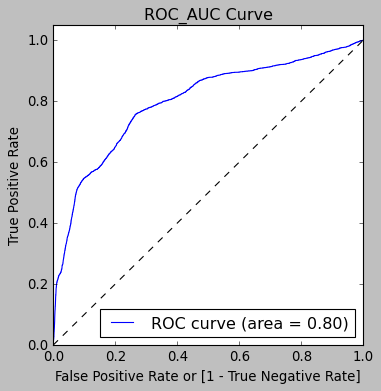

In [50]:
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

---
## Precision and Recall

In [51]:
# Looking at the confusion matrix again
confusion

array([[22752,   272],
       [ 2330,   604]], dtype=int64)

##### Precision
    TP / TP + FP

In [52]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6894977168949772

##### Recall
    TP / TP + FN

In [53]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.2058623040218132

---
#### Using sklearn utilities for finding precision and recall

In [54]:
precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.6894977168949772

In [55]:
recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.2058623040218132

---
## Making predictions on Test data

In [104]:
logm_test = sm.GLM(ytest,xtest1, family=sm.families.Binomial())
res1 = logm_test.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Response_Target   No. Observations:                11126
Model:                            GLM   Df Residuals:                    11110
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3184.3
Date:                Mon, 15 Nov 2021   Deviance:                       6368.5
Time:                        14:29:33   Pearson chi2:                 1.08e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1300
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4380      0.039    -61.914      0.000      -2.515      -2.361
education          0.0297      0.033      0.895      0.371      -0.035       0.095
default            0.0755      0.041      1.843      0.065      -0.005       0.156
contact           -0.4176      0.054     -7.744      0.000      -0.523      -0.312
month             -0.0320      0.044     -0.724      0.469      -0.118       0.055
day_of_week        0.0117      0.033      0.354      0.723      -0.053       0.076
duration          -0.2326      0.033     -7.077      0.000      -0.297      -0.168
campaign          -0.1366      0.042     -3.271      0.001      -0.218      -0.055
pdays              0.1583      0.030      5.318      0.000       0.100       0.217
poutcome           0.1434      0.033      4.385      0.000       0.079       0.208
emp.var.rate      -1.1386      0.192     -5.933      0.000      -1.515      -0.762
cons.price.idx     0.7068      0.105      6.763      0.000       0.502       0.912
cons.conf.idx      0.2691      0.047      5.719      0.000       0.177       0.361
euribor3m          0.0313      0.307      0.102      0.919      -0.570       0.633
nr.employed       -0.0918      0.201     -0.456      0.648      -0.486       0.302
City_Name          0.0442      0.034      1.307      0.191      -0.022       0.111
==================================================================================
"""

In [106]:
y_test_pred = res1.predict(xtest1)
y_train_pred[:10]

array([0.02867943, 0.02948278, 0.04770032, 0.85721569, 0.03416815,
       0.03247528, 0.02815376, 0.03888928, 0.0389462 , 0.06595098])

In [107]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [108]:
y_test_df = pd.DataFrame(ytest)

In [109]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [111]:
y_pred.head()

,Response_Target,0
0,0,0.060960
1,0,0.063495
2,0,0.049902
3,0,0.078523
4,0,0.058703


In [112]:
y_pred.rename(columns={'Response_Target':'Sub',0:'Sub_prob'},inplace=True)

In [113]:

y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [114]:
y_pred.head(20)

,Sub,Sub_prob,final_predict
0,0,0.060960,0
1,0,0.063495,0
2,0,0.049902,0
3,0,0.078523,0
4,0,0.058703,0
5,0,0.139097,0
6,0,0.060606,0
7,0,0.053934,0
8,0,0.368938,1
9,0,0.090519,0


In [115]:
# overall accuracy of the model on test data
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.8767751213374079

In [116]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[9195,  657],
       [ 714,  560]], dtype=int64)

In [117]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.43956043956043955

In [120]:
# Let us calculate specificity
TN/float(TN+FP)

0.9333130328867235

## Using Sk-learn to build logistic regression model:
    Above we used the stats module to build the logistic regression model.
    Now we will use the sklearn module to do the same.

In [121]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [122]:
y_pred = logreg.predict(xtest)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.89205


In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[9663  189]
 [1012  262]]


##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|9663|189
**Sub**|1012|262

In [124]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9852
           1       0.58      0.21      0.30      1274

    accuracy                           0.89     11126
   macro avg       0.74      0.59      0.62     11126
weighted avg       0.87      0.89      0.87     11126



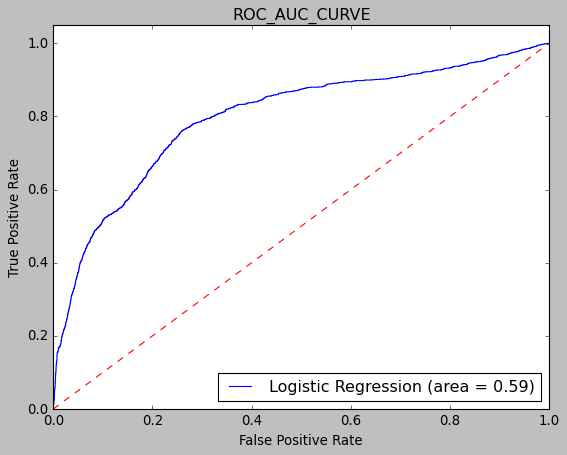

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, logreg.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Using GridSearchCV to get the best model parameters:

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                "solver" : ["lbfgs","sag","saga"], 
               
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                "solver" : ["lbfgs","sag","saga"], 
                
            }
]
logreg_grid = GridSearchCV(estimator = LogisticRegression(n_jobs=-1 ), param_grid = params, scoring = "f1",n_jobs=-1)
logreg_grid.fit(xtrain, ytrain)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1'],
                          'solver': ['lbfgs', 'sag', 'saga']}],
             scoring='f1')

In [128]:
logreg_grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [129]:
logreg_grid.best_score_

0.3294622458874984

In [130]:
y_pred = logreg_grid.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9852
           1       0.58      0.21      0.30      1274

    accuracy                           0.89     11126
   macro avg       0.74      0.59      0.62     11126
weighted avg       0.87      0.89      0.87     11126



In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[9662  190]
 [1012  262]]


### Building model with best parameters:

In [132]:
clf= LogisticRegression(**logreg_grid.best_params_)

clf.fit(xtrain,ytrain)

LogisticRegression(C=10)

In [133]:
y_pred = clf.predict(xtest)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(clf.score(xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.89196


In [134]:
y_pred = clf.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9852
           1       0.58      0.21      0.30      1274

    accuracy                           0.89     11126
   macro avg       0.74      0.59      0.62     11126
weighted avg       0.87      0.89      0.87     11126



In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[9662  190]
 [1012  262]]


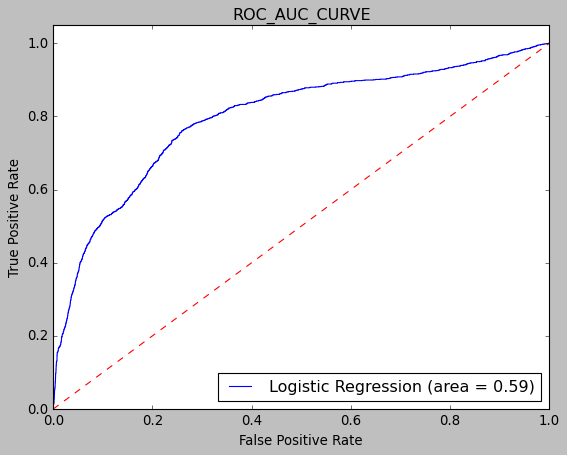

In [136]:
logit_roc_auc = roc_auc_score(ytest, clf.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, clf.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Note:
    We know this is an imbalanced dataset so we need to oversample and undersample the data and check the models performance

#### Over-sampling and under-sampling the data and building models on it.

#### Under-sampling:

In [137]:

from collections import Counter
from imblearn.under_sampling import NearMiss

nms=NearMiss()
x2,y2=nms.fit_resample(xtrain,ytrain.ravel())
print('Number of rows before undersampling:{}'.format(Counter(ytrain)))
print('Number of rows after undersampling: {}'.format(Counter(y2)))

Number of rows before undersampling:Counter({0: 23024, 1: 2934})
Number of rows after undersampling: Counter({0: 2934, 1: 2934})


In [138]:
logreg_uf1=LogisticRegression()
logreg_uf1.fit(x2,y2)
logreg_uf1.score(xtest,ytest)
y_pred = logreg_uf1.predict(xtest)

In [141]:
metrics.roc_auc_score(ytest, logreg_uf1.predict(xtest))

0.6294731890695002

In [143]:

print(classification_report(ytest, logreg_uf1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68      9852
           1       0.17      0.73      0.27      1274

    accuracy                           0.56     11126
   macro avg       0.55      0.63      0.48     11126
weighted avg       0.85      0.56      0.63     11126



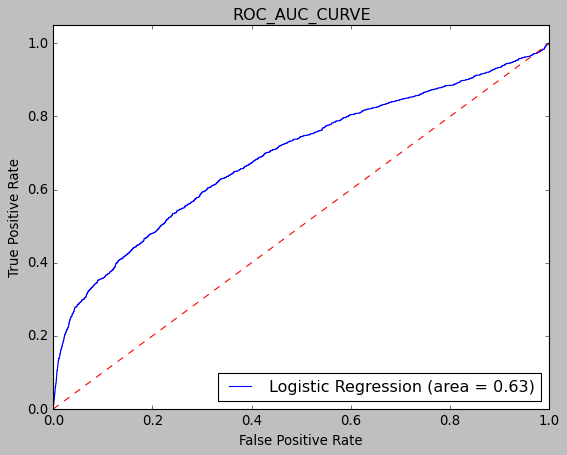

In [144]:
logit_roc_auc = roc_auc_score(ytest, logreg_uf1.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg_uf1.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###### Running GridSearch for best model params:

In [146]:
params = [
            {
                "penalty" : ['l2'], 
                "C" :[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                "solver" : ["lbfgs","sag","saga"],
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                "solver" : ["lbfgs","sag","saga"], 
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs=-1 ), param_grid = params, scoring = "f1",n_jobs=-1)
clf.fit(x2, y2)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1'],
                          'solver': ['lbfgs', 'sag', 'saga']}],
             scoring='f1')

In [147]:
clf.best_estimator_

LogisticRegression(C=100, n_jobs=-1, solver='saga')

In [148]:
clf.best_score_

0.7734048300151255

In [149]:
clf.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'saga'}

In [151]:
logreg_uf2=LogisticRegression(**clf.best_params_)
logreg_uf2.fit(x2,y2)
logreg_uf2.score(xtest,ytest)

0.554017616394032

In [152]:
print(classification_report(ytest, logreg_uf2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68      9852
           1       0.17      0.73      0.27      1274

    accuracy                           0.55     11126
   macro avg       0.55      0.63      0.48     11126
weighted avg       0.85      0.55      0.63     11126



#### Oversampling:

In [153]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(xtrain,ytrain.ravel())

In [154]:
print('Number of rows before oversampling:{}'.format(Counter(ytrain)))
print('Number of rows after oversampling: {}'.format(Counter(y1)))

Number of rows before oversampling:Counter({0: 23024, 1: 2934})
Number of rows after oversampling: Counter({0: 23024, 1: 23024})


In [156]:
logreg_of1=LogisticRegression()
logreg_of1.fit(x1,y1)
logreg_of1.score(xtest,ytest)


0.7982203846845227

In [157]:
y_pred = logreg_of1.predict(xtest)

In [158]:
metrics.roc_auc_score(ytest, logreg_of1.predict(xtest))

0.7350263491511099

In [159]:

print(classification_report(ytest, logreg_of1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      9852
           1       0.32      0.65      0.43      1274

    accuracy                           0.80     11126
   macro avg       0.63      0.74      0.65     11126
weighted avg       0.88      0.80      0.83     11126



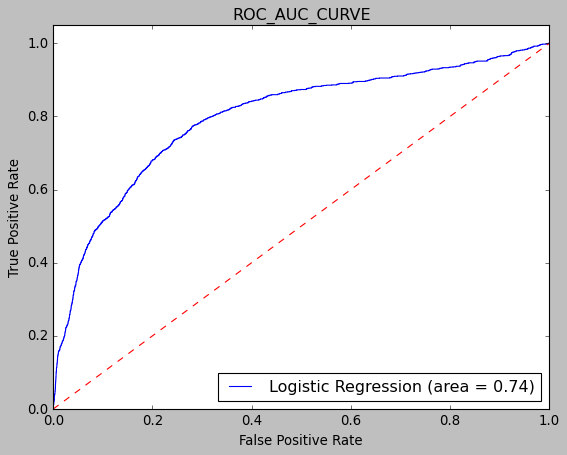

In [160]:
logit_roc_auc = roc_auc_score(ytest, logreg_of1.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg_of1.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Using GridSearch to get best model params:

In [161]:
params = [
            {
                "penalty" : ['l2'], 
                "C" :[0.1,0.001,0.0001,10,0.01,100,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"],
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.1,0.001,0.0001,10,100,0.01,0.002,1000], 
                "solver" : ["lbfgs","sag","saga"], 
            }
]
clf = GridSearchCV(estimator = LogisticRegression( n_jobs=-1),n_jobs=-1, param_grid = params, scoring = "f1")
clf.fit(x1, y1)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.001, 0.0001, 10, 0.01, 100, 0.002, 1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'sag', 'saga']},
                         {'C': [0.1, 0.001, 0.0001, 10, 100, 0.01, 0.002, 1000],
                          'penalty': ['l1'],
                          'solver': ['lbfgs', 'sag', 'saga']}],
             scoring='f1')

In [162]:
clf.best_estimator_

LogisticRegression(C=1000, n_jobs=-1)

In [163]:
clf.best_score_

0.7431036068859845

In [165]:
logreg_of2=LogisticRegression(**clf.best_params_)
logreg_of2.fit(x1,y1)
logreg_of2.score(xtest,ytest)

0.7985799029300737

In [166]:
print(classification_report(ytest, logreg_of2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      9852
           1       0.32      0.65      0.43      1274

    accuracy                           0.80     11126
   macro avg       0.63      0.73      0.65     11126
weighted avg       0.88      0.80      0.83     11126



#### Here also we see that taking the best params in the model f1 scores remain the same.

# Decision Tree 
### Training with label encoded dataset

In [383]:
y = df_data.Response_Target

In [384]:
import sklearn.model_selection as model_selection
from sklearn.metrics import classification_report
import sklearn.tree as tree
import sklearn.metrics as metrics
x_train,x_test,y_train,y_test=model_selection.train_test_split(df,y,test_size=0.2,random_state=200)

In [385]:

dtclf1=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
dtclf1.fit(x_train,y_train)
dtclf1.score(x_test,y_test)

0.9130376162869085

In [386]:

metrics.roc_auc_score(y_test, dtclf1.predict_proba(x_test)[:,1])

0.8569747461560567

In [387]:
import pydotplus
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Users/hsumukh/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'
os.chdir('C:/Users/hsumukh/Desktop/Training/Capstone Project1_Marketing Data/Marketing_Campaign_P1')

In [388]:
dot_data= tree.export_graphviz(dtclf1, feature_names=df.columns, class_names=["0","1"], filled=True, rounded=True, special_characters=True,
                              proportion=True,out_file=None)

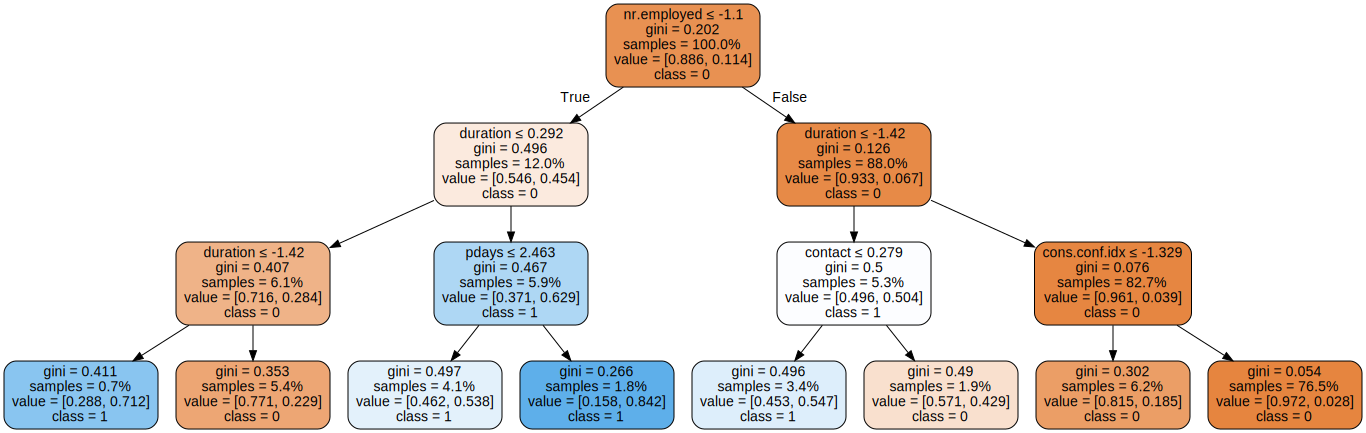

In [389]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [390]:
decisiontree=model_selection.GridSearchCV(dtclf1,param_grid={'max_depth':[2,3,4,5,6]})
decisiontree.fit(x_train,y_train)
print("Best_Estimator:",decisiontree.best_estimator_)
print("Best_Score",decisiontree.best_score_)

Best_Estimator: DecisionTreeClassifier(max_depth=6, random_state=200)
Best_Score 0.9087874138417134


In [391]:
clf1=tree.DecisionTreeClassifier(max_depth=6,random_state=200)
clf1.fit(x_train,y_train)
clf1.score(x_test,y_test)
print("ROC_AUC_SCORE",metrics.roc_auc_score(y_test, clf1.predict_proba(x_test)[:,1]))

ROC_AUC_SCORE 0.9115106249060985


In [392]:

print(classification_report(y_test, decisiontree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6584
           1       0.63      0.46      0.53       833

    accuracy                           0.91      7417
   macro avg       0.78      0.71      0.74      7417
weighted avg       0.90      0.91      0.90      7417



The precision,recall and f1-score for the target value of 0 is above 90%, but the recall of target value of 1 is very low. This may be due to the imbalance in the data. In the next step we will try oversampling and undersampling of data using SMOTE and NEARMISS package respectively.

In [179]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
smt=SMOTE()
x1,y1=smt.fit_resample(x_train,y_train.ravel())
nms=NearMiss()
x2,y2=nms.fit_resample(x_train,y_train.ravel())

In [181]:
clfo=tree.DecisionTreeClassifier(max_depth=6,random_state=200)
clfo.fit(x1,y1)
clfo.score(xtest,ytest)

0.8920546467733238

In [182]:
metrics.roc_auc_score(y_test, clfo.predict_proba(x_test)[:,1])

0.9021295942435298

In [183]:
print(classification_report(y_test, clfo.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      6584
           1       0.51      0.71      0.59       833

    accuracy                           0.89      7417
   macro avg       0.74      0.81      0.76      7417
weighted avg       0.91      0.89      0.90      7417



This oversample model has a better recall and considerably a good f1-score to the target value of 1 than other model till now.

### Lets train with data with dummy columns.

In [397]:
x_train1,x_test1,y_train,y_test=model_selection.train_test_split(df3,y,test_size=0.2,random_state=200)

In [398]:
dtclf2=tree.DecisionTreeClassifier(max_depth=6,random_state=200)
dtclf2.fit(x_train1,y_train)
dtclf2.score(x_test1,y_test)

0.908183901847108

In [399]:
metrics.roc_auc_score(y_test, dtclf2.predict_proba(x_test1)[:,1])

0.9017332023939588

In [400]:
dot_data1= tree.export_graphviz(dtclf2, feature_names=df3.columns, class_names=["0","1"], filled=True, rounded=True, special_characters=True,
                              proportion=True,out_file=None)

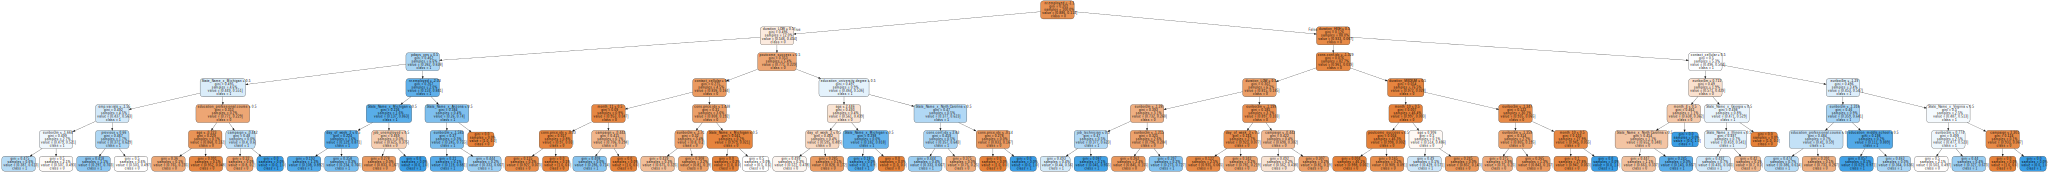

In [401]:
graph1 = graphviz.Source(dot_data1, format="png") 
graph1

In [402]:
decisiontree2=model_selection.GridSearchCV(dtclf2,param_grid={'max_depth':[2,3,4,5,6]})
decisiontree2.fit(x_train1,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [403]:
decisiontree2.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=200)

In [404]:
decisiontree2.best_score_

0.9100009822071667

In [405]:
print(classification_report(y_test, decisiontree2.predict(x_test1)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6584
           1       0.66      0.37      0.48       833

    accuracy                           0.91      7417
   macro avg       0.79      0.67      0.71      7417
weighted avg       0.90      0.91      0.90      7417



# RandomForestClassifier

### Training with label encoded data.

In [205]:
X=df
X.shape

(37084, 23)

In [412]:
from sklearn.ensemble import RandomForestClassifier

In [413]:
Randomclf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [414]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [415]:
Randomclf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [416]:
Randomclf.oob_score_

0.9094616914416692

In [417]:
for w in range(10,300,20):
    Randomclf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    Randomclf.fit(X_train,y_train)
    oob=Randomclf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 10
OOB score is 0.8963494792193346
************************
For n_estimators = 30
OOB score is 0.9045741059089224
************************
For n_estimators = 50
OOB score is 0.9077763171200324
************************
For n_estimators = 70
OOB score is 0.9087875417130145
************************
For n_estimators = 90
OOB score is 0.9091246165773418
************************
For n_estimators = 110
OOB score is 0.9091246165773418
************************
For n_estimators = 130
OOB score is 0.9106751609532477
************************
For n_estimators = 150
OOB score is 0.9099673037381603
************************
For n_estimators = 170
OOB score is 0.9102706711160549
************************
For n_estimators = 190
OOB score is 0.9098324737924293
************************
For n_estimators = 210
OOB score is 0.9103043786024876
************************
For n_estimators = 230
OOB score is 0.9101021336838911
************************
For n_estimators = 250
OOB score is 0.9104392

In [418]:

def display_metrics(X_test,y_test,clf):
    ypred=clf.predict(X_test)
    print('Confusion matrix:\n',metrics.confusion_matrix(y_test,ypred),'\n')
    print('Classification Report:\n',metrics.classification_report(y_test,ypred))
    print('Accuracy:',metrics.accuracy_score(y_test,ypred))

In [419]:
display_metrics(X_test,y_test,Randomclf)

Confusion matrix:
 [[6377  215]
 [ 461  364]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6592
           1       0.63      0.44      0.52       825

    accuracy                           0.91      7417
   macro avg       0.78      0.70      0.73      7417
weighted avg       0.90      0.91      0.90      7417

Accuracy: 0.9088580288526359


In [420]:
#Finalize 190 trees
Random=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [421]:
Random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=190, n_jobs=-1, oob_score=True,
                       random_state=400)

In [422]:
Random.oob_score_

0.9098324737924293

In [423]:
Random.score(X_test,y_test)

0.909127679654847

In [424]:
Random.feature_importances_

array([7.36434830e-02, 8.92817257e-03, 1.90905149e-02, 1.21288202e-02,
       3.69376749e-02, 1.25310623e-02, 2.63179205e-02, 2.35488591e-02,
       2.89791773e-02, 9.14248925e-02, 4.67776884e-02, 1.27136544e-02,
       8.61505242e-03, 4.00845874e-03, 2.76038966e-03, 6.72769528e-03,
       6.43933165e-03, 3.74590425e-03, 6.43372643e-03, 4.31501956e-03,
       9.69442180e-03, 3.54175838e-03, 7.03501994e-03, 1.22453547e-02,
       1.11603553e-02, 1.11028754e-02, 7.93521476e-05, 9.88770845e-03,
       8.57443605e-03, 1.27240381e-02, 6.92187452e-03, 6.78271077e-03,
       5.89049626e-03, 3.85299358e-03, 5.20030207e-03, 3.59200949e-03,
       2.97974304e-03, 3.02038040e-03, 2.53133556e-03, 5.55206033e-03,
       2.61748525e-03, 1.05417682e-03, 1.14974349e-02, 1.03493665e-02,
       1.08201509e-02, 1.13170882e-02, 1.06075177e-02, 7.71720131e-02,
       5.13951920e-02, 3.32524801e-02, 1.81520512e-02, 1.72238812e-02,
       7.45470837e-03, 7.63093130e-03, 1.81607007e-02, 9.24539753e-04,
      

In [425]:
imp_feat=pd.Series(Random.feature_importances_,index=X.columns.tolist())

In [426]:
imp_feat.sort_values(ascending=False)

euribor3m                     0.091425
duration_HIGH                 0.077172
age                           0.073643
duration_LOW                  0.051395
nr.employed                   0.046778
                                ...   
State_Name_x_Montana          0.000202
State_Name_x_Maine            0.000166
education_illiterate          0.000079
State_Name_x_West Virginia    0.000070
State_Name_x_Wyoming          0.000039
Length: 108, dtype: float64

In [427]:
display_metrics(X_test,y_test,Random)

Confusion matrix:
 [[6371  221]
 [ 453  372]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6592
           1       0.63      0.45      0.52       825

    accuracy                           0.91      7417
   macro avg       0.78      0.71      0.74      7417
weighted avg       0.90      0.91      0.90      7417

Accuracy: 0.909127679654847


# roc_auc

In [222]:
def display_roc_auc(X_test,y_test,clf):
    fpr,tpr,thresholds=metrics.roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,"-")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc-auc curve')
    print('ROC-AUC Score:',metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))


ROC-AUC Score: 0.9138435464323587


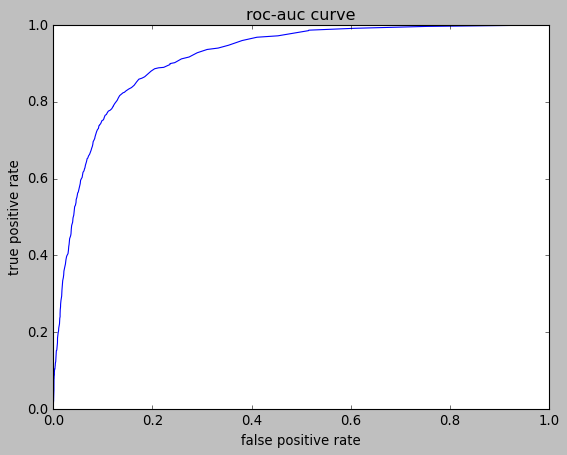

In [223]:
display_roc_auc(X_test,y_test,Random)

# RandomizedSearchCV

In [224]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [226]:
from sklearn.ensemble import RandomForestRegressor
Randomclf1 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
Randomclf1= RandomizedSearchCV(Randomclf,random_grid)
# Fit the random search model
Randomclf1.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=290, n_jobs=-1,
                                                    oob_score=True,
                                                    random_state=400),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]})

In [227]:
#clf1random.best_params_
#clf1random.best_score_
#clf1random.best_estimator_

In [228]:
Randomclf1.best_params_


{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [229]:
Randomclf1.best_score_

0.9100346522006696

In [230]:
Randomclf1.best_estimator_

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=130, n_jobs=-1,
                       oob_score=True, random_state=400)

In [231]:
display_metrics(X_test,y_test,Randomclf1)

Confusion matrix:
 [[6385  216]
 [ 454  362]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6601
           1       0.63      0.44      0.52       816

    accuracy                           0.91      7417
   macro avg       0.78      0.71      0.73      7417
weighted avg       0.90      0.91      0.90      7417

Accuracy: 0.9096669812592693


# oversampling

In [232]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [233]:
sm = SMOTE(random_state=2)
xtrain_sm, ytrain_sm = sm.fit_resample(X_train, y_train.ravel())
print('Number of rows before oversampling:{}'.format(Counter(y_train)))
print('Number of rows after oversampling: {}'.format(Counter(ytrain_sm)))

Number of rows before oversampling:Counter({0: 26275, 1: 3392})
Number of rows after oversampling: Counter({0: 26275, 1: 26275})


In [234]:
Randomclf_os=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
Randomclf_os.fit(xtrain_sm,ytrain_sm)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [235]:
Randomclf_os.score(X_test,y_test)

0.9054873938249967

In [236]:
display_metrics(X_test,y_test,Randomclf_os)

Confusion matrix:
 [[6275  326]
 [ 375  441]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      6601
           1       0.57      0.54      0.56       816

    accuracy                           0.91      7417
   macro avg       0.76      0.75      0.75      7417
weighted avg       0.90      0.91      0.90      7417

Accuracy: 0.9054873938249967


# RandomForestClassifier 

### with dummies

In [237]:
X=df3
X.shape

(37084, 108)

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
Randomclf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [240]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [241]:
Randomclf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [242]:
Randomclf.oob_score_

0.9048437658003843

In [243]:
for w in range(10,300,20):
    Randomclf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    Randomclf.fit(X_train,y_train)
    oob=Randomclf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 10
OOB score is 0.8963831867057673
************************
For n_estimators = 30
OOB score is 0.9032932214244784
************************
For n_estimators = 50
OOB score is 0.9044729834496241
************************
For n_estimators = 70
OOB score is 0.904877473286817
************************
For n_estimators = 90
OOB score is 0.9053493780968753
************************
For n_estimators = 110
OOB score is 0.904877473286817
************************
For n_estimators = 130
OOB score is 0.9067650925270503
************************
For n_estimators = 150
OOB score is 0.9064280176627229
************************
For n_estimators = 170
OOB score is 0.9062257727441265
************************
For n_estimators = 190
OOB score is 0.9067313850406176
************************
For n_estimators = 210
OOB score is 0.9062257727441265
************************
For n_estimators = 230
OOB score is 0.9058886978797991
************************
For n_estimators = 250
OOB score is 0.905854990

In [244]:
display_metrics(X_test,y_test,Randomclf)

Confusion matrix:
 [[6432  196]
 [ 418  371]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6628
           1       0.65      0.47      0.55       789

    accuracy                           0.92      7417
   macro avg       0.80      0.72      0.75      7417
weighted avg       0.91      0.92      0.91      7417

Accuracy: 0.9172172037211811


In [245]:
#Finalize 190 trees
Random=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [246]:
Random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=190, n_jobs=-1, oob_score=True,
                       random_state=400)

In [247]:
Random.oob_score_

0.9067313850406176

In [248]:
Random.score(X_test,y_test)

0.9168127275178644

In [249]:
Random.feature_importances_

array([7.52912665e-02, 8.98072833e-03, 1.89816019e-02, 1.20267301e-02,
       3.72776751e-02, 1.26041806e-02, 2.35403029e-02, 2.63155156e-02,
       2.91924598e-02, 8.90491314e-02, 4.70645799e-02, 1.30627784e-02,
       8.63285249e-03, 3.72186462e-03, 2.65485771e-03, 6.43403873e-03,
       6.75314836e-03, 3.84129667e-03, 6.54425175e-03, 4.02880835e-03,
       9.74855602e-03, 3.79588832e-03, 7.22292647e-03, 1.26028194e-02,
       1.16920433e-02, 1.07134441e-02, 9.05701254e-05, 9.68608275e-03,
       8.04049770e-03, 1.24356166e-02, 6.53669608e-03, 6.78981753e-03,
       5.42334626e-03, 4.02356698e-03, 5.32837100e-03, 3.18109411e-03,
       2.91883513e-03, 2.97911149e-03, 2.51375434e-03, 5.87545735e-03,
       2.62795688e-03, 9.97467483e-04, 1.11290622e-02, 1.06552691e-02,
       1.07286269e-02, 1.12136047e-02, 1.04196959e-02, 7.32193226e-02,
       5.23213931e-02, 3.41749735e-02, 2.03667448e-02, 1.81681137e-02,
       7.66399612e-03, 7.78665456e-03, 1.67769060e-02, 1.05729966e-03,
      

In [250]:
imp_feat=pd.Series(Random.feature_importances_,index=X.columns.tolist())

In [251]:
imp_feat.sort_values(ascending=False)

euribor3m                     0.089049
age                           0.075291
duration_HIGH                 0.073219
duration_LOW                  0.052321
nr.employed                   0.047065
                                ...   
State_Name_x_Montana          0.000244
State_Name_x_Maine            0.000174
education_illiterate          0.000091
State_Name_x_Wyoming          0.000033
State_Name_x_West Virginia    0.000010
Length: 108, dtype: float64

In [252]:
import sklearn.metrics as metrics

In [253]:

def display_metrics(X_test,y_test,clf):
    ypred=clf.predict(X_test)
    print('Confusion matrix:\n',metrics.confusion_matrix(y_test,ypred),'\n')
    print('Classification Report:\n',metrics.classification_report(y_test,ypred))
    print('Accuracy:',metrics.accuracy_score(y_test,ypred))

In [254]:
display_metrics(X_test,y_test,Random)

Confusion matrix:
 [[6427  201]
 [ 416  373]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6628
           1       0.65      0.47      0.55       789

    accuracy                           0.92      7417
   macro avg       0.79      0.72      0.75      7417
weighted avg       0.91      0.92      0.91      7417

Accuracy: 0.9168127275178644


# roc_auc

ROC-AUC Score: 0.9252841384975825


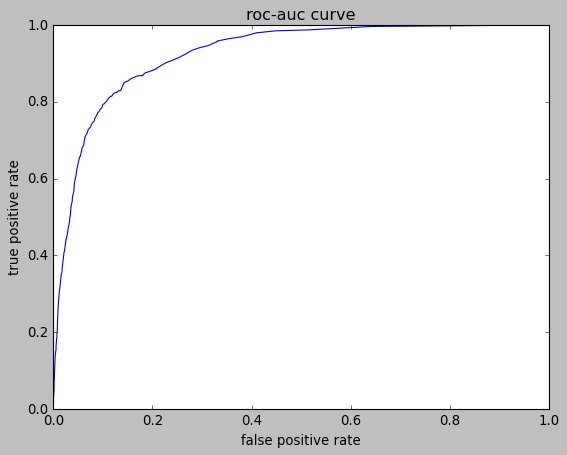

In [257]:
display_roc_auc(X_test,y_test,Random)

# oversampling

In [438]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [439]:
sm = SMOTE(random_state=2)
xtrain_sm, ytrain_sm = sm.fit_resample(X_train, y_train.ravel())
print('Number of rows before oversampling:{}'.format(Counter(y_train)))
print('Number of rows after oversampling: {}'.format(Counter(ytrain_sm)))

Number of rows before oversampling:Counter({0: 26284, 1: 3383})
Number of rows after oversampling: Counter({0: 26284, 1: 26284})


In [440]:
Randomclf1_os=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
Randomclf1_os.fit(xtrain_sm,ytrain_sm)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [441]:
Randomclf1_os.score(X_test,y_test)

0.9035998382095187

In [442]:
display_metrics(X_test,y_test,Randomclf1_os)

Confusion matrix:
 [[6210  382]
 [ 333  492]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      6592
           1       0.56      0.60      0.58       825

    accuracy                           0.90      7417
   macro avg       0.76      0.77      0.76      7417
weighted avg       0.91      0.90      0.90      7417

Accuracy: 0.9035998382095187


# ---------------------------------------------------------------------------------

### gb xgb without dummies

In [266]:
X=df
X.shape

(37084, 23)

In [453]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=345)

In [454]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [455]:
def display_metrics(X_test,y_test,clf):
    ypred=clf.predict(X_test)
    print('Confusion matrix:\n',metrics.confusion_matrix(y_test,ypred),'\n')
    print('Classification Report:\n',metrics.classification_report(y_test,ypred))
    print('Accuracy:',metrics.accuracy_score(y_test,ypred))

In [456]:
def display_roc_auc(X_test,y_test,clf):
    fpr,tpr,thresholds=metrics.roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,"-")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc-auc curve')
    print('ROC-AUC Score:',metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))

In [457]:
def display_feature_importances(clf):
    print('Feature Importances:\n',clf.feature_importances_)
    imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())
    imp_feat.sort_values(ascending=False).plot(kind='bar')
    plt.title('Feature Importance plot for top 30 features')
    plt.xlabel('Feature names')
    plt.ylabel('Feature importances')

## Gradient Boosting

In [458]:
gb=GradientBoostingClassifier(n_estimators=80,random_state=400,learning_rate=0.1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [459]:
gb.score(X_test,y_test)

0.9165430767156533

In [460]:
display_metrics(X_test,y_test,gb)

Confusion matrix:
 [[6353  232]
 [ 387  445]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6585
           1       0.66      0.53      0.59       832

    accuracy                           0.92      7417
   macro avg       0.80      0.75      0.77      7417
weighted avg       0.91      0.92      0.91      7417

Accuracy: 0.9165430767156533


ROC-AUC Score: 0.9263051406167864


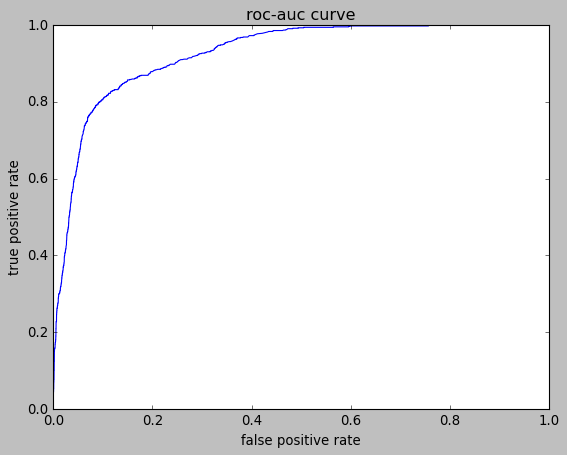

In [461]:
display_roc_auc(X_test,y_test,gb)

Feature Importances:
 [8.16561069e-03 1.18018355e-03 4.45197233e-04 0.00000000e+00
 2.12604007e-03 1.26412078e-03 9.95437654e-03 4.84265275e-03
 3.28908067e-02 5.46548424e-02 3.49035626e-01 0.00000000e+00
 7.15711075e-04 0.00000000e+00 1.00700529e-04 0.00000000e+00
 6.28093920e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.16760307e-04 0.00000000e+00 3.53786742e-04
 1.83723701e-04 8.44238949e-05 8.02836792e-03 4.57716165e-03
 6.07423157e-03 5.58758656e-03 1.74292119e-03 9.98467733e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.29899973e-02
 0.00000000e+00 0.00000000e+00 1.95309964e-03 1.36136728e-03
 0.00000000e+00 0.00000000e+00 8.88094601e-04 2.51177172e-01
 1.56143605e-01 3.90061238e-03 9.28876849e-03 3.35926986e-02
 6.50391299e-03 0.00000000e+00 2.12441828e-02 0.00000000e+00
 0.00000000e+00 2.18928483e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.28247582e-04 0.00000000e+00 9.03085222e-04
 0

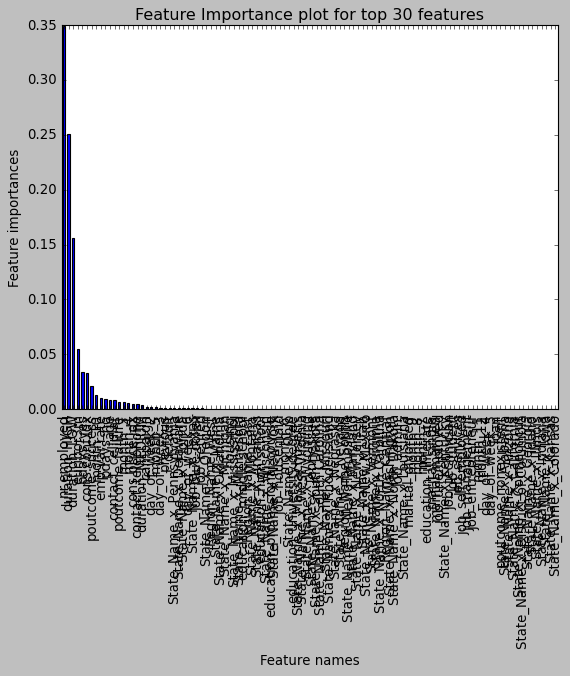

In [462]:
display_feature_importances(gb)

### Gradient Boosting with sample weights
#### Sample weights are added for the class imbalance problem

In [463]:
from sklearn.utils.class_weight import compute_sample_weight

gb_sw=GradientBoostingClassifier(n_estimators=80,random_state=400)
gb_sw.fit(X_train,y_train,sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [464]:
gb_sw.score(X_test,y_test)

0.8527706619927194

In [465]:
display_metrics(X_test,y_test,gb_sw)

Confusion matrix:
 [[5610  975]
 [ 117  715]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.42      0.86      0.57       832

    accuracy                           0.85      7417
   macro avg       0.70      0.86      0.74      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.8527706619927194


#### The f1-score remains the same adding the sample weights

ROC-AUC Score: 0.9266150670229543


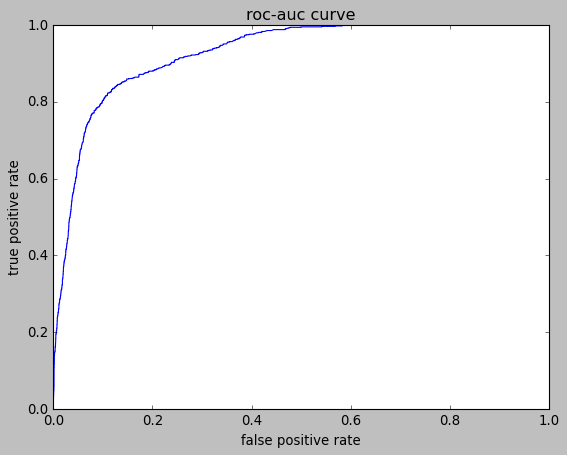

In [466]:
display_roc_auc(X_test,y_test,gb_sw)

### Oversampling

In [544]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [545]:
sm = SMOTE(random_state=2)
xtrain_sm, ytrain_sm = sm.fit_resample(X_train, y_train.ravel())
print('Number of rows before oversampling:{}'.format(Counter(y_train)))
print('Number of rows after oversampling: {}'.format(Counter(ytrain_sm)))

Number of rows before oversampling:Counter({0: 26291, 1: 3376})
Number of rows after oversampling: Counter({0: 26291, 1: 26291})


In [469]:
gb_os=GradientBoostingClassifier(n_estimators=60,learning_rate=0.1,max_depth=5,random_state=400)
gb_os.fit(xtrain_sm,ytrain_sm)

GradientBoostingClassifier(max_depth=5, n_estimators=60, random_state=400)

In [470]:
gb_os.score(X_test,y_test)

0.9126331400835918

In [471]:
display_metrics(X_test,y_test,gb_os)

Confusion matrix:
 [[6189  396]
 [ 252  580]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6585
           1       0.59      0.70      0.64       832

    accuracy                           0.91      7417
   macro avg       0.78      0.82      0.80      7417
weighted avg       0.92      0.91      0.92      7417

Accuracy: 0.9126331400835918


#### The f1 score for class 1 increased to 59 with oversampling

ROC-AUC Score: 0.9266150670229543


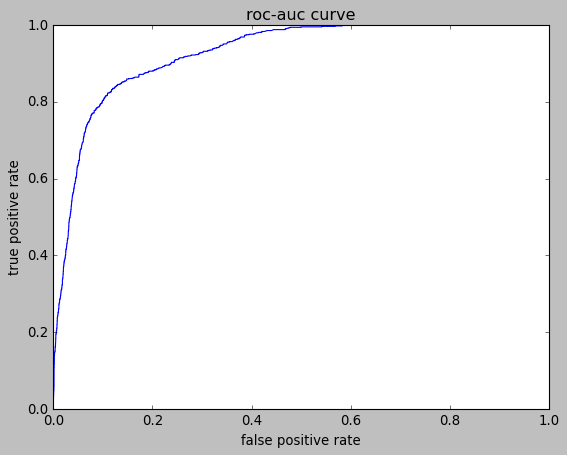

In [472]:
display_roc_auc(X_test,y_test,gb_sw)

### Undersampling

In [473]:
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
ns=NearMiss(0.8)

X_train_ns,y_train_ns=under_sampler.fit_resample(X_train,y_train)
print("The number of rows before undersampling {}".format(Counter(y_train)))
print("The number of rows after undersampling {}".format(Counter(y_train_ns)))

The number of rows before undersampling Counter({0: 26291, 1: 3376})
The number of rows after undersampling Counter({0: 3376, 1: 3376})


In [474]:
gb_us=GradientBoostingClassifier(n_estimators=80,random_state=400)
gb_us.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [475]:
gb_us.score(X_test,y_test)

0.8476472967507078

In [476]:
display_metrics(X_test,y_test,gb_us)

Confusion matrix:
 [[5576 1009]
 [ 121  711]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.41      0.85      0.56       832

    accuracy                           0.85      7417
   macro avg       0.70      0.85      0.73      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.8476472967507078


#### The f1 score for class 1 reduces to 57 with undersampling

#### The f1 score for class 1 is  59 with oversampling in Gradient Boosting

# XGBoost

In [517]:
xgb=XGBClassifier(n_estimators=80,random_state=400)
xgb.fit(X_train,y_train)

[17:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [518]:
xgb.score(X_test,y_test)

0.914116219495753

In [519]:
display_metrics(X_test,y_test,xgb)

Confusion matrix:
 [[6375  210]
 [ 427  405]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6585
           1       0.66      0.49      0.56       832

    accuracy                           0.91      7417
   macro avg       0.80      0.73      0.76      7417
weighted avg       0.91      0.91      0.91      7417

Accuracy: 0.914116219495753


ROC-AUC Score: 0.9273259995035337


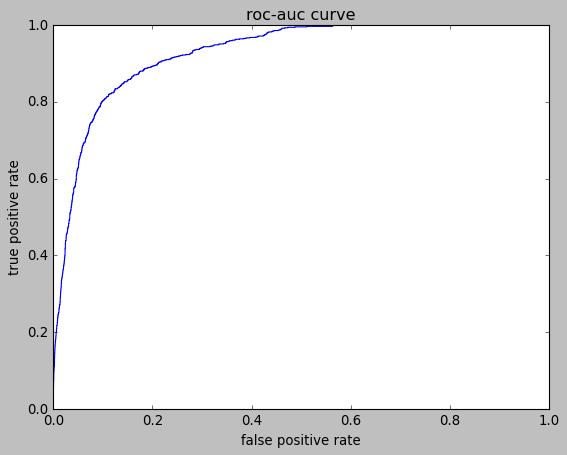

In [520]:
display_roc_auc(X_test,y_test,xgb)

Feature Importances:
 [0.00415943 0.00681846 0.00402888 0.0044828  0.00393597 0.00454208
 0.0289373  0.00533917 0.01179643 0.00807294 0.2800353  0.0040037
 0.00615326 0.00435602 0.00437287 0.00415973 0.00644269 0.00331084
 0.00401253 0.00278474 0.00467392 0.00492314 0.00468239 0.00374202
 0.00422931 0.00349467 0.         0.00426657 0.00462509 0.00499649
 0.00954906 0.         0.00390852 0.00556548 0.01441484 0.00775677
 0.00475911 0.00302779 0.00447553 0.01944275 0.00436184 0.00291962
 0.0057306  0.00508166 0.00749075 0.003916   0.0057677  0.1310927
 0.08832645 0.00350053 0.0250606  0.         0.00715708 0.
 0.02227811 0.00270364 0.0041111  0.00441347 0.0039512  0.00528052
 0.0037048  0.00330515 0.0013682  0.00440397 0.00469987 0.00141878
 0.0033608  0.00316928 0.00463119 0.00244048 0.00470429 0.00303599
 0.00113113 0.00272579 0.00230357 0.00731025 0.00344381 0.00268064
 0.00349393 0.00192391 0.00269311 0.00164761 0.00145801 0.00517504
 0.00450838 0.00411218 0.00490006 0.         0.005

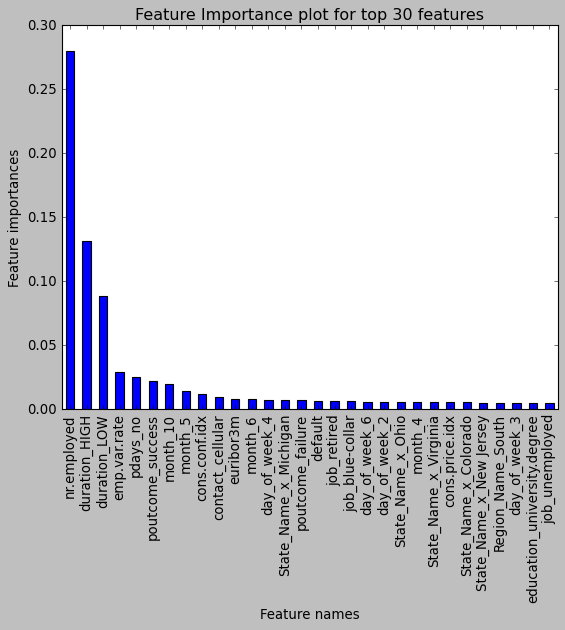

In [521]:
display_feature_importances(xgb)

### XGBoost with sample weights
#### Sample weights are added for the class imbalance problem

In [522]:
from sklearn.utils.class_weight import compute_sample_weight

xgb_sw=XGBClassifier(n_estimators=80,random_state=400)
xgb_sw.fit(X_train,y_train,sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

[17:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [523]:
xgb_sw.score(X_test,y_test)

0.8766347579884051

In [524]:
display_metrics(X_test,y_test,xgb_sw)

Confusion matrix:
 [[5831  754]
 [ 161  671]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      6585
           1       0.47      0.81      0.59       832

    accuracy                           0.88      7417
   macro avg       0.72      0.85      0.76      7417
weighted avg       0.92      0.88      0.89      7417

Accuracy: 0.8766347579884051


#### The f1 score for class 1 increased to 60 by adding sample weights

ROC-AUC Score: 0.9230429735412652


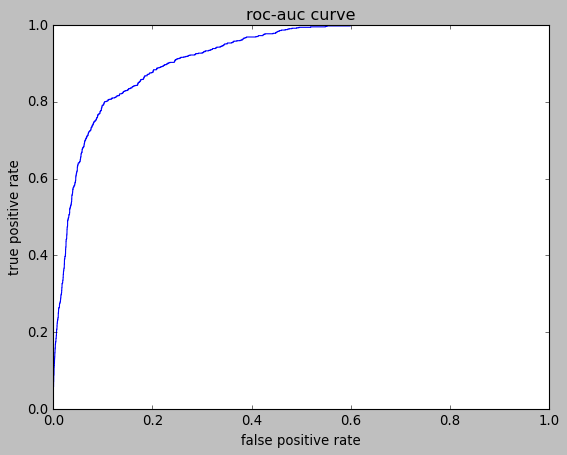

In [525]:
display_roc_auc(X_test,y_test,xgb_sw)

### Oversampling

In [526]:
xgb_os=XGBClassifier(n_estimators=140,learning_rate=0.1,max_depth=3,min_child_weight=5,random_state=400)
xgb_os.fit(xtrain_sm,ytrain_sm,sample_weight=compute_sample_weight(class_weight='balanced', y=ytrain_sm))

[17:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [527]:
xgb_os.score(X_test,y_test)

0.9093973304570581

In [528]:
display_metrics(X_test,y_test,xgb_os)

Confusion matrix:
 [[6166  419]
 [ 253  579]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6585
           1       0.58      0.70      0.63       832

    accuracy                           0.91      7417
   macro avg       0.77      0.82      0.79      7417
weighted avg       0.92      0.91      0.91      7417

Accuracy: 0.9093973304570581


#### The f1 score increased from 57 to 58 with oversampling

### Undersampling

In [529]:
xgb_us=XGBClassifier(n_estimators=80,random_state=400)
xgb_us.fit(X_train_ns,y_train_ns)

[17:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [530]:
xgb_us.score(X_test,y_test)

0.8448159633274909

In [531]:
display_metrics(X_test,y_test,xgb_us)

Confusion matrix:
 [[5562 1023]
 [ 128  704]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      6585
           1       0.41      0.85      0.55       832

    accuracy                           0.84      7417
   macro avg       0.69      0.85      0.73      7417
weighted avg       0.91      0.84      0.87      7417

Accuracy: 0.8448159633274909


#### The f1 score for class 1 got reduced to 55 with undersampling

#### The highest f1 score for class 1 increased to 60 by adding sample weights in XGBoost

## with dummies gb and xgb

In [480]:
X=df3
X.head()

,age,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,State_Name_x_Vermont,State_Name_x_Virginia,State_Name_x_Washington,State_Name_x_West Virginia,State_Name_x_Wisconsin,State_Name_x_Wyoming,Region_Name_Central,Region_Name_East,Region_Name_South,Region_Name_West
0,1.675975,0.511647,-1.100649,2.360903,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
1,0.546800,-1.953139,-1.100649,-0.423555,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
2,-0.787680,0.511647,-1.100649,-0.423555,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
3,-0.377071,0.511647,-1.100649,-0.423555,-0.691147,-0.348986,0.648396,0.722436,0.888175,0.712429,...,0,0,0,0,0,0,0,0,1,0
4,-0.890332,0.511647,-1.100649,-0.423555,-0.192460,-0.348986,0.648396,0.722436,0.888175,0.711852,...,0,0,0,0,0,0,0,0,1,0


In [481]:
y

0        0
1        0
2        0
3        0
4        0
        ..
37079    0
37080    0
37081    0
37082    0
37083    1
Name: Response_Target, Length: 37084, dtype: int64

In [482]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=345)

In [483]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [484]:
def display_metrics(X_test,y_test,clf):
    ypred=clf.predict(X_test)
    print('Confusion matrix:\n',metrics.confusion_matrix(y_test,ypred),'\n')
    print('Classification Report:\n',metrics.classification_report(y_test,ypred))
    print('Accuracy:',metrics.accuracy_score(y_test,ypred))

In [485]:
def display_roc_auc(X_test,y_test,clf):
    fpr,tpr,thresholds=metrics.roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,"-")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc-auc curve')
    print('ROC-AUC Score:',metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))

In [486]:
def display_feature_importances(clf):
    print('Feature Importances:\n',clf.feature_importances_)
    imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())
    imp_feat.sort_values(ascending=False).head(30).plot(kind='bar')
    plt.title('Feature Importance plot for top 30 features')
    plt.xlabel('Feature names')
    plt.ylabel('Feature importances')

## Gradient Boosting

In [487]:
gb1=GradientBoostingClassifier(n_estimators=80,random_state=400,learning_rate=0.1)
gb1.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [488]:
gb1.score(X_test,y_test)

0.9165430767156533

In [489]:
display_metrics(X_test,y_test,gb1)

Confusion matrix:
 [[6353  232]
 [ 387  445]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6585
           1       0.66      0.53      0.59       832

    accuracy                           0.92      7417
   macro avg       0.80      0.75      0.77      7417
weighted avg       0.91      0.92      0.91      7417

Accuracy: 0.9165430767156533


ROC-AUC Score: 0.9263051406167864


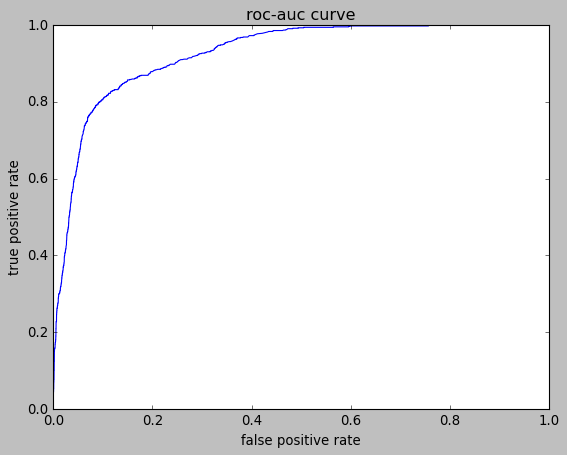

In [490]:
display_roc_auc(X_test,y_test,gb1)

Feature Importances:
 [8.16561069e-03 1.18018355e-03 4.45197233e-04 0.00000000e+00
 2.12604007e-03 1.26412078e-03 9.95437654e-03 4.84265275e-03
 3.28908067e-02 5.46548424e-02 3.49035626e-01 0.00000000e+00
 7.15711075e-04 0.00000000e+00 1.00700529e-04 0.00000000e+00
 6.28093920e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.16760307e-04 0.00000000e+00 3.53786742e-04
 1.83723701e-04 8.44238949e-05 8.02836792e-03 4.57716165e-03
 6.07423157e-03 5.58758656e-03 1.74292119e-03 9.98467733e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.29899973e-02
 0.00000000e+00 0.00000000e+00 1.95309964e-03 1.36136728e-03
 0.00000000e+00 0.00000000e+00 8.88094601e-04 2.51177172e-01
 1.56143605e-01 3.90061238e-03 9.28876849e-03 3.35926986e-02
 6.50391299e-03 0.00000000e+00 2.12441828e-02 0.00000000e+00
 0.00000000e+00 2.18928483e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.28247582e-04 0.00000000e+00 9.03085222e-04
 0

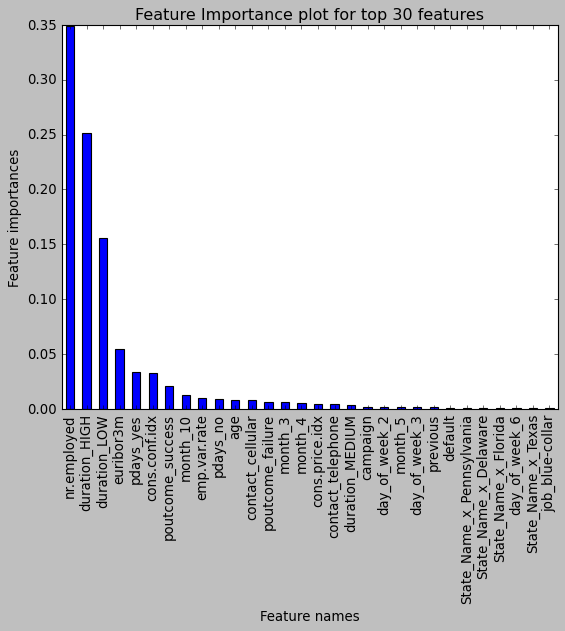

In [491]:
display_feature_importances(gb1)

### Gradient Boosting with sample weights
#### Sample weights are added for the class imbalance problem

In [492]:
from sklearn.utils.class_weight import compute_sample_weight

gb1_sw=GradientBoostingClassifier(n_estimators=80,random_state=400)
gb1_sw.fit(X_train,y_train,sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [493]:
gb1_sw.score(X_test,y_test)

0.8527706619927194

In [494]:
display_metrics(X_test,y_test,gb1_sw)

Confusion matrix:
 [[5610  975]
 [ 117  715]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.42      0.86      0.57       832

    accuracy                           0.85      7417
   macro avg       0.70      0.86      0.74      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.8527706619927194


#### The f1-score remains the same adding the sample weights

ROC-AUC Score: 0.9266150670229543


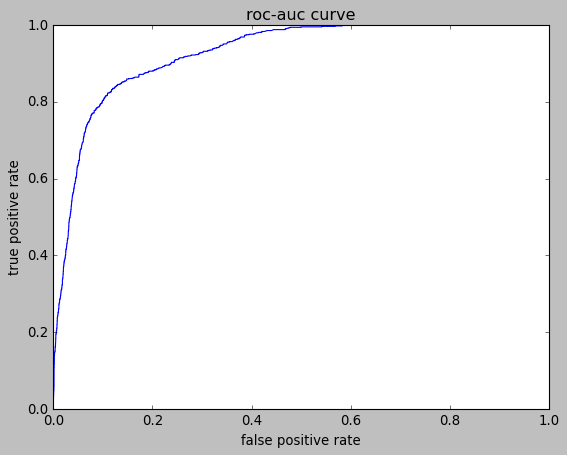

In [495]:
display_roc_auc(X_test,y_test,gb1_sw)

### Oversampling

In [496]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [497]:
sm = SMOTE(random_state=2)
xtrain_sm, ytrain_sm = sm.fit_resample(X_train, y_train.ravel())
print('Number of rows before oversampling:{}'.format(Counter(y_train)))
print('Number of rows after oversampling: {}'.format(Counter(ytrain_sm)))

Number of rows before oversampling:Counter({0: 26291, 1: 3376})
Number of rows after oversampling: Counter({0: 26291, 1: 26291})


In [498]:
gb1_os=GradientBoostingClassifier(n_estimators=60,learning_rate=0.1,max_depth=5,random_state=400)
gb1_os.fit(xtrain_sm,ytrain_sm)

GradientBoostingClassifier(max_depth=5, n_estimators=60, random_state=400)

In [499]:
gb1_os.score(X_test,y_test)

0.9126331400835918

In [500]:
display_metrics(X_test,y_test,gb1_os)

Confusion matrix:
 [[6189  396]
 [ 252  580]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6585
           1       0.59      0.70      0.64       832

    accuracy                           0.91      7417
   macro avg       0.78      0.82      0.80      7417
weighted avg       0.92      0.91      0.92      7417

Accuracy: 0.9126331400835918


#### The f1 score for class 1 increased from 59 to 64 with oversampling

### Undersampling

In [501]:
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
ns=NearMiss(0.8)

X_train_ns,y_train_ns=under_sampler.fit_resample(X_train,y_train)
print("The number of rows before undersampling {}".format(Counter(y_train)))
print("The number of rows after undersampling {}".format(Counter(y_train_ns)))

The number of rows before undersampling Counter({0: 26291, 1: 3376})
The number of rows after undersampling Counter({0: 3376, 1: 3376})


In [502]:
gb1_us=GradientBoostingClassifier(n_estimators=80,random_state=400)
gb1_us.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [503]:
gb1_us.score(X_test,y_test)

0.8510179317783471

In [504]:
display_metrics(X_test,y_test,gb1_us)

Confusion matrix:
 [[5599  986]
 [ 119  713]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.42      0.86      0.56       832

    accuracy                           0.85      7417
   macro avg       0.70      0.85      0.74      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.8510179317783471


#### The f1 score for class 1 got reduced with oversampling

#### The highest f1 score of 63 for class 1 is got in oversampling with Gradient Boost

# XGBoost

In [505]:
xgb1=XGBClassifier(n_estimators=80,random_state=400)
xgb1.fit(X_train,y_train)

[17:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [506]:
xgb1.score(X_test,y_test)

0.914116219495753

In [507]:
display_metrics(X_test,y_test,xgb1)

Confusion matrix:
 [[6375  210]
 [ 427  405]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6585
           1       0.66      0.49      0.56       832

    accuracy                           0.91      7417
   macro avg       0.80      0.73      0.76      7417
weighted avg       0.91      0.91      0.91      7417

Accuracy: 0.914116219495753


ROC-AUC Score: 0.9273259995035337


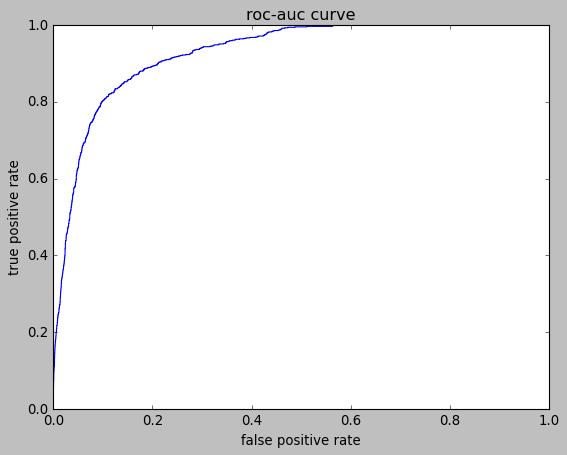

In [508]:
display_roc_auc(X_test,y_test,xgb1)

Feature Importances:
 [0.00415943 0.00681846 0.00402888 0.0044828  0.00393597 0.00454208
 0.0289373  0.00533917 0.01179643 0.00807294 0.2800353  0.0040037
 0.00615326 0.00435602 0.00437287 0.00415973 0.00644269 0.00331084
 0.00401253 0.00278474 0.00467392 0.00492314 0.00468239 0.00374202
 0.00422931 0.00349467 0.         0.00426657 0.00462509 0.00499649
 0.00954906 0.         0.00390852 0.00556548 0.01441484 0.00775677
 0.00475911 0.00302779 0.00447553 0.01944275 0.00436184 0.00291962
 0.0057306  0.00508166 0.00749075 0.003916   0.0057677  0.1310927
 0.08832645 0.00350053 0.0250606  0.         0.00715708 0.
 0.02227811 0.00270364 0.0041111  0.00441347 0.0039512  0.00528052
 0.0037048  0.00330515 0.0013682  0.00440397 0.00469987 0.00141878
 0.0033608  0.00316928 0.00463119 0.00244048 0.00470429 0.00303599
 0.00113113 0.00272579 0.00230357 0.00731025 0.00344381 0.00268064
 0.00349393 0.00192391 0.00269311 0.00164761 0.00145801 0.00517504
 0.00450838 0.00411218 0.00490006 0.         0.005

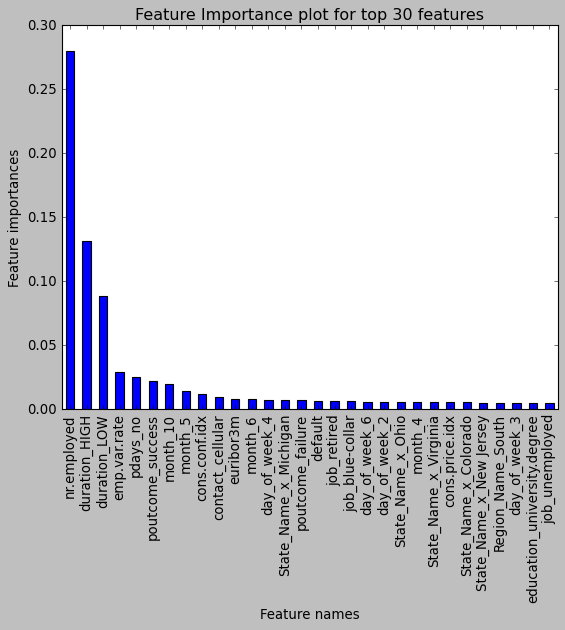

In [509]:
display_feature_importances(xgb1)

### XGBoost with sample weights
#### Sample weights are added for the class imbalance problem

In [510]:
from sklearn.utils.class_weight import compute_sample_weight

xgb1_sw=XGBClassifier(n_estimators=80,random_state=400)
xgb1_sw.fit(X_train,y_train,sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

[17:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [511]:
xgb1_sw.score(X_test,y_test)

0.8766347579884051

In [512]:
display_metrics(X_test,y_test,xgb1_sw)

Confusion matrix:
 [[5831  754]
 [ 161  671]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      6585
           1       0.47      0.81      0.59       832

    accuracy                           0.88      7417
   macro avg       0.72      0.85      0.76      7417
weighted avg       0.92      0.88      0.89      7417

Accuracy: 0.8766347579884051


#### The f1 score increased from 56 to 59 with sample weights

### Oversampling

In [346]:
xgb1_os=XGBClassifier(n_estimators=140,learning_rate=0.1,max_depth=3,min_child_weight=5,random_state=400)
xgb1_os.fit(xtrain_sm,ytrain_sm,sample_weight=compute_sample_weight(class_weight='balanced', y=ytrain_sm))

[15:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [347]:
xgb1_os.score(X_test,y_test)

0.9093973304570581

In [348]:
display_metrics(X_test,y_test,xgb1_os)

Confusion matrix:
 [[6166  419]
 [ 253  579]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6585
           1       0.58      0.70      0.63       832

    accuracy                           0.91      7417
   macro avg       0.77      0.82      0.79      7417
weighted avg       0.92      0.91      0.91      7417

Accuracy: 0.9093973304570581


#### The f1 score for class 1 increased from 56 to 63 with oversampling

### Undersampling

In [349]:
xgb1_us=XGBClassifier(n_estimators=80,random_state=400)
xgb1_us.fit(X_train_ns,y_train_ns)

[15:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [350]:
xgb1_us.score(X_test,y_test)

0.8411756774976406

In [351]:
display_metrics(X_test,y_test,xgb1_us)

Confusion matrix:
 [[5531 1054]
 [ 124  708]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      6585
           1       0.40      0.85      0.55       832

    accuracy                           0.84      7417
   macro avg       0.69      0.85      0.72      7417
weighted avg       0.91      0.84      0.86      7417

Accuracy: 0.8411756774976406


#### The f1 score for class 1 got reduced to 56 with oversampling

#### The highest f1 score of 63 for class 1  63 is got in oversampling in XGBoost

## Bagging Classifier

Training with data which has been label encoded

In [553]:
X=df
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=23)

In [554]:
bagclf=BaggingClassifier(n_estimators=120,n_jobs=-1,random_state=23,oob_score=True,base_estimator=DecisionTreeClassifier())
bagclf.fit(xtrain,ytrain)
print("OOB Score: ",bagclf.oob_score_)
print("Score:",bagclf.score(xtest,ytest))
print(classification_report(ytest,bagclf.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,bagclf.predict(xtest)))

OOB Score:  0.9081470994707924
Score: 0.9035998382095187
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6573
           1       0.59      0.51      0.55       844

    accuracy                           0.90      7417
   macro avg       0.76      0.73      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Roc_Auc_Score 0.732875334468236


## Oversampling and Undersampling

In [555]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
smt=SMOTE()
x1,y1=smt.fit_resample(xtrain,ytrain.ravel())

nms=NearMiss()
x11,y11=nms.fit_resample(xtrain,ytrain.ravel())


In [556]:
bagcl_os=BaggingClassifier(n_estimators=120,n_jobs=-1,random_state=23,oob_score=True,base_estimator=DecisionTreeClassifier())
bagcl_os.fit(x1,y1)
print("OOB Score: ",bagcl_os.oob_score_)
print("Score:",bagcl_os.score(xtest,ytest))
print(classification_report(ytest,bagcl_os.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,bagcl_os.predict(xtest)))

OOB Score:  0.9523818575827853
Score: 0.8980719967641904
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6573
           1       0.55      0.58      0.56       844

    accuracy                           0.90      7417
   macro avg       0.75      0.76      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Roc_Auc_Score 0.7597047161913991


In [557]:
bagcl_us=BaggingClassifier(n_estimators=120,n_jobs=-1,random_state=23,oob_score=True,base_estimator=DecisionTreeClassifier())
bagcl_us.fit(x11,y11)
print("OOB Score: ",bagcl_us.oob_score_)
print("Score:",bagcl_us.score(xtest,ytest))
print(classification_report(ytest,bagcl_us.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,bagcl_us.predict(xtest)))

OOB Score:  0.8283293697978596
Score: 0.6805986247809087
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      6573
           1       0.24      0.83      0.37       844

    accuracy                           0.68      7417
   macro avg       0.60      0.75      0.58      7417
weighted avg       0.89      0.68      0.74      7417

Roc_Auc_Score 0.7475043315934856


Training with values which are dummy encoded.


In [559]:
X=df3
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=23)

In [560]:
bagclf1=BaggingClassifier(n_estimators=120,n_jobs=-1,random_state=23,oob_score=True,base_estimator=DecisionTreeClassifier())
bagclf1.fit(xtrain,ytrain)
print("OOB Score: ",bagclf1.oob_score_)
print("Score:",bagclf1.score(xtest,ytest))
print(classification_report(ytest,bagclf1.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,bagclf1.predict(xtest)))

OOB Score:  0.9090909090909091
Score: 0.9048132668194688
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6573
           1       0.60      0.51      0.55       844

    accuracy                           0.90      7417
   macro avg       0.77      0.73      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Roc_Auc_Score 0.7325272567728239


## Oversampling and undersampling

In [561]:
smt=SMOTE()
x1,y1=smt.fit_resample(xtrain,ytrain.ravel())

nms=NearMiss()
x11,y11=nms.fit_resample(xtrain,ytrain.ravel())


In [562]:
bagcl_us1=BaggingClassifier(n_estimators=120,n_jobs=-1,random_state=23,oob_score=True,base_estimator=DecisionTreeClassifier())
bagcl_us1.fit(x11,y11)
print("OOB Score: ",bagcl_us1.oob_score_)
print("Score:",bagcl_us1.score(xtest,ytest))
print(classification_report(ytest,bagcl_us1.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,bagcl_us1.predict(xtest)))

OOB Score:  0.832639714625446
Score: 0.7045975461776999
              precision    recall  f1-score   support

           0       0.97      0.69      0.80      6573
           1       0.26      0.84      0.39       844

    accuracy                           0.70      7417
   macro avg       0.61      0.76      0.60      7417
weighted avg       0.89      0.70      0.76      7417

Roc_Auc_Score 0.7641426617434672


In [563]:
bagcl_os1=BaggingClassifier(n_estimators=120,n_jobs=-1,random_state=23,oob_score=True,base_estimator=DecisionTreeClassifier())
bagcl_os1.fit(x1,y1)
print("OOB Score: ",bagcl_os1.oob_score_)
print("Score:",bagcl_os1.score(xtest,ytest))
print(classification_report(ytest,bagcl_os1.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,bagcl_os1.predict(xtest)))

OOB Score:  0.9497775919096682
Score: 0.8969933935553458
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6573
           1       0.54      0.58      0.56       844

    accuracy                           0.90      7417
   macro avg       0.75      0.76      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Roc_Auc_Score 0.7590961660620822


## AdaBoost Classifier

Training using label encoded data.

In [565]:
X=df
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=23)

In [566]:
ada=AdaBoostClassifier(n_estimators=100,random_state=400,learning_rate=0.99)
ada.fit(xtrain,ytrain)
print("Score:",ada.score(xtest,ytest))
print(classification_report(ytest,ada.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,ada.predict(xtest)))

Score: 0.907240124039369
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6573
           1       0.64      0.42      0.51       844

    accuracy                           0.91      7417
   macro avg       0.78      0.70      0.73      7417
weighted avg       0.90      0.91      0.90      7417

Roc_Auc_Score 0.6967194172916202


## Oversampling and Undersampling

In [567]:
smt=SMOTE()
x1,y1=smt.fit_resample(xtrain,ytrain.ravel())

nms=NearMiss()
x11,y11=nms.fit_resample(xtrain,ytrain.ravel())


In [568]:
ada_os=AdaBoostClassifier(n_estimators=100,random_state=400,learning_rate=0.99)
ada_os.fit(x1,y1)
print("Score:",ada_os.score(xtest,ytest))
print(classification_report(ytest,ada_os.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,ada_os.predict(xtest)))

Score: 0.9011729809896184
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6573
           1       0.56      0.60      0.58       844

    accuracy                           0.90      7417
   macro avg       0.75      0.77      0.76      7417
weighted avg       0.90      0.90      0.90      7417

Roc_Auc_Score 0.7707485671312269


In [569]:
ada_us=AdaBoostClassifier(n_estimators=100,random_state=400,learning_rate=0.99)
ada_us.fit(x11,y11)
print("Score:",ada_us.score(xtest,ytest))
print(classification_report(ytest,ada_us.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,ada_us.predict(xtest)))

Score: 0.6567345287852231
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      6573
           1       0.23      0.83      0.35       844

    accuracy                           0.66      7417
   macro avg       0.60      0.73      0.56      7417
weighted avg       0.88      0.66      0.72      7417

Roc_Auc_Score 0.7304257219142218


In [571]:
X=df3
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=23)

In [572]:
ada1=AdaBoostClassifier(n_estimators=100,random_state=400,learning_rate=0.99)
ada1.fit(xtrain,ytrain)
print("Score:",ada1.score(xtest,ytest))
print(classification_report(ytest,ada1.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,ada1.predict(xtest)))

Score: 0.9045436160172576
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6573
           1       0.62      0.43      0.50       844

    accuracy                           0.90      7417
   macro avg       0.77      0.70      0.73      7417
weighted avg       0.89      0.90      0.90      7417

Roc_Auc_Score 0.6967470868546684


In [573]:
smt=SMOTE()
x1,y1=smt.fit_resample(xtrain,ytrain.ravel())

nms=NearMiss()
x11,y11=nms.fit_resample(xtrain,ytrain.ravel())


In [574]:
ada_os1=AdaBoostClassifier(n_estimators=100,random_state=400,learning_rate=0.99)
ada_os1.fit(x1,y1)
print("Score:",ada_os1.score(xtest,ytest))
print(classification_report(ytest,ada_os1.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,ada_os1.predict(xtest)))

Score: 0.9015774571929351
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6573
           1       0.57      0.57      0.57       844

    accuracy                           0.90      7417
   macro avg       0.76      0.76      0.76      7417
weighted avg       0.90      0.90      0.90      7417

Roc_Auc_Score 0.7575517177481049


In [576]:
ada_us1=AdaBoostClassifier(n_estimators=100,random_state=400,learning_rate=0.99)
ada_us1.fit(x11,y11)
print("Score:",ada_us1.score(xtest,ytest))
print(classification_report(ytest,ada_us1.predict(xtest)))
print('Roc_Auc_Score',roc_auc_score(ytest,ada_us1.predict(xtest)))

Score: 0.6885533234461373
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      6573
           1       0.24      0.83      0.38       844

    accuracy                           0.69      7417
   macro avg       0.61      0.75      0.59      7417
weighted avg       0.89      0.69      0.75      7417

Roc_Auc_Score 0.7514760405017511


In [408]:
print("Classification reports of all models\n\n")
print("*************Logistic Regression*********** ")
display_metrics(xtest,ytest,logreg)
print('\n\n**************Logistic Regression with Oversampled Data****************')
display_metrics(xtest,ytest,logreg_of2)
print('\n\n*****************Logistic Regression with Undersampled Data********************')
display_metrics(xtest,ytest,logreg_uf2)
print('\n\n****************Decision Tree(Label Encoded)**********************')
display_metrics(x_test,y_test,clf1)
print('\n\n*********Decision Tree with Oversampled Data(Label Encoded)**********')
display_metrics(x_test,y_test,clfo)
print('\n\n**********Decision Tree (Dummy Encoded)***************')
display_metrics(x_test1,y_test,decisiontree2)
print('\n\n**********Decision Tree with Oversampled Data(Dummy Encoded)***************')
display_metrics(x_test1,y_test,decisiontree2)

Classification reports of all models


*************Logistic Regression*********** 
Confusion matrix:
 [[9663  189]
 [1012  262]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9852
           1       0.58      0.21      0.30      1274

    accuracy                           0.89     11126
   macro avg       0.74      0.59      0.62     11126
weighted avg       0.87      0.89      0.87     11126

Accuracy: 0.8920546467733238


**************Logistic Regression with Oversampled Data****************
Confusion matrix:
 [[8054 1798]
 [ 443  831]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      9852
           1       0.32      0.65      0.43      1274

    accuracy                           0.80     11126
   macro avg       0.63      0.73      0.65     11126
weighted avg       0.88      0.80      0.83     11126

Accuracy: 0.798

In [443]:
print('\n\n**********Random forest (Label Encoded)***************')
display_metrics(X_test,y_test,Randomclf)
print('\n\n**********Random forest with oversampling (Label Encoded)***************')
display_metrics(X_test,y_test,Randomclf_os)
print('\n\n**********Random forest (Dummy Encoded)***************')
display_metrics(X_test,y_test,Random)

print('\n\n**********Random forest with oversampling(Dummy Encoded)***************')
display_metrics(X_test,y_test,Randomclf1_os)




**********Random forest (Label Encoded)***************
Confusion matrix:
 [[6377  215]
 [ 461  364]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6592
           1       0.63      0.44      0.52       825

    accuracy                           0.91      7417
   macro avg       0.78      0.70      0.73      7417
weighted avg       0.90      0.91      0.90      7417

Accuracy: 0.9088580288526359


**********Random forest with oversampling (Label Encoded)***************
Confusion matrix:
 [[6210  382]
 [ 333  492]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      6592
           1       0.56      0.60      0.58       825

    accuracy                           0.90      7417
   macro avg       0.76      0.77      0.76      7417
weighted avg       0.91      0.90      0.90      7417

Accuracy: 0.9035998382095187


**********

In [513]:
print('\n\n**********Gradient Boosting (Label Encoded)***************')
display_metrics(X_test,y_test,gb)
print('\n\n**********Gradient Boosting with sample weights (Label Encoded)***************')
display_metrics(X_test,y_test,gb_sw)
print('\n\n**********Gradient Boosting with oversampling(Label Encoded)***************')
display_metrics(X_test,y_test,gb_os)

print('\n\n**********Gradient Boosting with undersampling(Label Encoded)***************')
display_metrics(X_test,y_test,gb_us)




**********Gradient Boosting (Label Encoded)***************
Confusion matrix:
 [[6353  232]
 [ 387  445]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6585
           1       0.66      0.53      0.59       832

    accuracy                           0.92      7417
   macro avg       0.80      0.75      0.77      7417
weighted avg       0.91      0.92      0.91      7417

Accuracy: 0.9165430767156533


**********Gradient Boosting with sample weights (Label Encoded)***************
Confusion matrix:
 [[5610  975]
 [ 117  715]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.42      0.86      0.57       832

    accuracy                           0.85      7417
   macro avg       0.70      0.86      0.74      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.8527706619927194




In [532]:
print('\n\n**********XG Boosting (Label Encoded)***************')
display_metrics(X_test,y_test,xgb)
print('\n\n**********XG Boosting with sample weights (Label Encoded)***************')
display_metrics(X_test,y_test,xgb_sw)
print('\n\n**********XG Boosting with oversampling(Label Encoded)***************')
display_metrics(X_test,y_test,xgb_os)

print('\n\n**********XG Boosting with undersampling(Label Encoded)***************')
display_metrics(X_test,y_test,xgb_us)




**********XG Boosting (Label Encoded)***************
Confusion matrix:
 [[6375  210]
 [ 427  405]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6585
           1       0.66      0.49      0.56       832

    accuracy                           0.91      7417
   macro avg       0.80      0.73      0.76      7417
weighted avg       0.91      0.91      0.91      7417

Accuracy: 0.914116219495753


**********XG Boosting with sample weights (Label Encoded)***************
Confusion matrix:
 [[5831  754]
 [ 161  671]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      6585
           1       0.47      0.81      0.59       832

    accuracy                           0.88      7417
   macro avg       0.72      0.85      0.76      7417
weighted avg       0.92      0.88      0.89      7417

Accuracy: 0.8766347579884051


**********XG 

In [534]:
print('\n\n**********XG Boosting (Dummy Encoded)***************')
display_metrics(X_test,y_test,xgb1)
print('\n\n**********XG Boosting with sample weights (Dummy Encoded)***************')
display_metrics(X_test,y_test,xgb1_sw)
print('\n\n**********XG Boosting with oversampling(Dummy Encoded)***************')
display_metrics(X_test,y_test,xgb1_os)

print('\n\n**********XG Boosting with undersampling(Dummy Encoded)***************')
display_metrics(X_test,y_test,xgb1_us)




**********XG Boosting (Dummy Encoded)***************
Confusion matrix:
 [[6375  210]
 [ 427  405]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6585
           1       0.66      0.49      0.56       832

    accuracy                           0.91      7417
   macro avg       0.80      0.73      0.76      7417
weighted avg       0.91      0.91      0.91      7417

Accuracy: 0.914116219495753


**********XG Boosting with sample weights (Dummy Encoded)***************
Confusion matrix:
 [[5831  754]
 [ 161  671]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      6585
           1       0.47      0.81      0.59       832

    accuracy                           0.88      7417
   macro avg       0.72      0.85      0.76      7417
weighted avg       0.92      0.88      0.89      7417

Accuracy: 0.8766347579884051


**********XG 

In [533]:
print('\n\n**********Gradient Boosting (Dummy Encoded)***************')
display_metrics(X_test,y_test,gb1)
print('\n\n**********Gradient Boosting with sample weights (Dummy Encoded)***************')
display_metrics(X_test,y_test,gb1_sw)
print('\n\n**********Gradient Boosting with oversampling(Dummy Encoded)***************')
display_metrics(X_test,y_test,gb1_os)

print('\n\n**********Gradient Boosting with undersampling(Dummy Encoded)***************')
display_metrics(X_test,y_test,gb1_us)




**********Gradient Boosting (Dummy Encoded)***************
Confusion matrix:
 [[6353  232]
 [ 387  445]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6585
           1       0.66      0.53      0.59       832

    accuracy                           0.92      7417
   macro avg       0.80      0.75      0.77      7417
weighted avg       0.91      0.92      0.91      7417

Accuracy: 0.9165430767156533


**********Gradient Boosting with sample weights (Dummy Encoded)***************
Confusion matrix:
 [[5610  975]
 [ 117  715]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6585
           1       0.42      0.86      0.57       832

    accuracy                           0.85      7417
   macro avg       0.70      0.86      0.74      7417
weighted avg       0.92      0.85      0.87      7417

Accuracy: 0.8527706619927194




In [558]:
print('\n\n**********Bagging Classifier (Label Encoded)***************')
display_metrics(xtest,ytest,bagclf)
print('\n\n**********Bagging Classifier with oversampling(Label Encoded)***************')
display_metrics(xtest,ytest,bagcl_os)
print('\n\n**********Bagging Classifier with undersampling(Label Encoded)***************')
display_metrics(xtest,ytest,bagcl_us)



**********Bagging Classifier (Label Encoded)***************
Confusion matrix:
 [[6270  303]
 [ 412  432]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      6573
           1       0.59      0.51      0.55       844

    accuracy                           0.90      7417
   macro avg       0.76      0.73      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Accuracy: 0.9035998382095187


**********Bagging Classifier with oversampling(Label Encoded)***************
Confusion matrix:
 [[6171  402]
 [ 354  490]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      6573
           1       0.55      0.58      0.56       844

    accuracy                           0.90      7417
   macro avg       0.75      0.76      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Accuracy: 0.8980719967641904


*

In [564]:
print('\n\n**********Bagging Classifier (Dummy Encoded)***************')
display_metrics(xtest,ytest,bagclf1)
print('\n\n**********Bagging Classifier with oversampling(Dummy Encoded)***************')
display_metrics(xtest,ytest,bagcl_os1)
print('\n\n**********Bagging Classifier with undersampling(Dummy Encoded)***************')
display_metrics(xtest,ytest,bagcl_us1)



**********Bagging Classifier (Dummy Encoded)***************
Confusion matrix:
 [[6281  292]
 [ 414  430]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6573
           1       0.60      0.51      0.55       844

    accuracy                           0.90      7417
   macro avg       0.77      0.73      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Accuracy: 0.9048132668194688


**********Bagging Classifier with oversampling(Dummy Encoded)***************
Confusion matrix:
 [[6163  410]
 [ 354  490]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      6573
           1       0.54      0.58      0.56       844

    accuracy                           0.90      7417
   macro avg       0.75      0.76      0.75      7417
weighted avg       0.90      0.90      0.90      7417

Accuracy: 0.8969933935553458


*

In [570]:
print('\n\n**********AdaBoost Classifier (Label Encoded)***************')
display_metrics(xtest,ytest,ada)
print('\n\n**********AdaBoost Classifier with oversampling(Label Encoded)***************')
display_metrics(xtest,ytest,ada_os)
print('\n\n**********AdaBoost Classifier with undersampling(Label Encoded)***************')
display_metrics(xtest,ytest,ada_us)



**********AdaBoost Classifier (Label Encoded)***************
Confusion matrix:
 [[6371  202]
 [ 486  358]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6573
           1       0.64      0.42      0.51       844

    accuracy                           0.91      7417
   macro avg       0.78      0.70      0.73      7417
weighted avg       0.90      0.91      0.90      7417

Accuracy: 0.907240124039369


**********AdaBoost Classifier with oversampling(Label Encoded)***************
Confusion matrix:
 [[6176  397]
 [ 336  508]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      6573
           1       0.56      0.60      0.58       844

    accuracy                           0.90      7417
   macro avg       0.75      0.77      0.76      7417
weighted avg       0.90      0.90      0.90      7417

Accuracy: 0.9011729809896184




In [577]:
print('\n\n**********AdaBoost Classifier (Dummy Encoded)***************')
display_metrics(xtest,ytest,ada1)
print('\n\n**********AdaBoost Classifier with oversampling(Dummy Encoded)***************')
display_metrics(xtest,ytest,ada_os1)
print('\n\n**********AdaBoost Classifier with undersampling(Dummy Encoded)***************')
display_metrics(xtest,ytest,ada_us1)



**********AdaBoost Classifier (Dummy Encoded)***************
Confusion matrix:
 [[6348  225]
 [ 483  361]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6573
           1       0.62      0.43      0.50       844

    accuracy                           0.90      7417
   macro avg       0.77      0.70      0.73      7417
weighted avg       0.89      0.90      0.90      7417

Accuracy: 0.9045436160172576


**********AdaBoost Classifier with oversampling(Dummy Encoded)***************
Confusion matrix:
 [[6205  368]
 [ 362  482]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      6573
           1       0.57      0.57      0.57       844

    accuracy                           0.90      7417
   macro avg       0.76      0.76      0.76      7417
weighted avg       0.90      0.90      0.90      7417

Accuracy: 0.9015774571929351



We need to choose the model based on the f1-score,recall and precision.<br>
F1-score: <br>
Recall: Shows how well the model recalls the training.
Precision:



The target of the dataset given was highly imbalanced, which resulted in poor training of the model. To overcome this issue, we tried oversampling and undersampling to the training data.


We consider F1-score,recall and precision as a metric to evaluate the model because the target column is highly imbalanced and the score metric will not provide us proper conclusion.

Based on the analysis of different classifiers,**The Gradient Boosting Classifier with oversampling provides best f1 score (95%,64%) among other classifiers. It also has higher recall (94%,70%) and precision (96%,59%) with an accuracy of 91%** hence we choose this classifier as our Final Machine Learning Model.